# NBA ShotPrediction

# TASK -1

## Bussines Case

Using given feautures of basketball to predict wether the shot will pass the net or not.

## Domain Analysis

## Dataset Description
* **DataShape** : The data has 24 quantitative input variables , and 1 quantitative output variable,and 25697 instances(observations).
* **Numerical Columns**: game_event_id, game_id, lat, loc_x, loc_y, lon, minutes_remaining, period, playoffs, seconds_remaining,shot_distance, shot_made_flag, team_id, shot_id.
* **Categorical Columns** : action_type, combined_shot_type, season, shot_type,shot_zone_area, shot_zone_basic, shot_zone_range, team_name,game_date, matchup, opponent.

## Data Attributes

1. **action_type**: Type of action associated with the shot (e.g., jump shot, layup).
2. **combined_shot_type**: A combined categorization of shot types (e.g., jump shot, layup) possibly incorporating additional factors.
3. **game_event_id**: Identifier for the specific event within a game.
4. **game_id**: Identifier for the specific game.
5. **lat**: Latitude coordinate of the shot location.
6. **loc_x**: X coordinate of the shot location on the court.
7. **loc_y**: Y coordinate of the shot location on the court.
8. **lon**: Longitude coordinate of the shot location.
9. **minutes_remaining**: Time remaining in minutes in the period when the shot was taken.
10. **period**: Period of the game when the shot was taken.
11. **playoffs**: Indicates whether the game is a playoff game or not.
12. **season**: Season in which the game was played.
13. **seconds_remaining**: Time remaining in seconds in the period when the shot was taken.
14. **shot_distance**: Distance of the shot from the basket in feet.
15. **shot_made_flag**: Binary indicator (0 or 1) representing whether the shot was made or missed.
16. **shot_type**: Type of shot (e.g., two-pointer, three-pointer).
17. **shot_zone_area**: Area on the court where the shot was taken (e.g., paint, left corner 3).
18. **shot_zone_basic**: Basic categorization of shot zones (e.g., restricted area, mid-range).
19. **shot_zone_range**: Range category of the shot zone (e.g., less than 8 ft, 24+ ft).
20. **team_id**: Identifier for the team.
21. **team_name**: Name of the team.
22. **game_date**: Date of the game.
23. **matchup**: Description of the matchup (e.g., Team A vs. Team B).
24. **opponent**: Name of the opposing team.
25. **shot_id**: Identifier for the specific shot.

## Project Process Steps
1. **Importing all the neccesary libraries**
2. **Understanding the data/ Insights from data**
3. **Exploratory Data Analysis (EDA)**
4. **Data Pre-processing**
5. **Feature Selection**
6. **Model Creation and Evaluation**
7. **Conclusion**

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## Understanding The Data

In [2]:
data = pd.read_csv(r'data.csv')

In [3]:
data

action_type combined_shot_type  game_event_id   game_id      lat  \
0              Jump Shot          Jump Shot             10  20000012  33.9723   
1              Jump Shot          Jump Shot             12  20000012  34.0443   
2              Jump Shot          Jump Shot             35  20000012  33.9093   
3              Jump Shot          Jump Shot             43  20000012  33.8693   
4      Driving Dunk Shot               Dunk            155  20000012  34.0443   
...                  ...                ...            ...       ...      ...   
30692          Jump Shot          Jump Shot            397  49900088  33.9963   
30693           Tip Shot           Tip Shot            398  49900088  34.0443   
30694  Running Jump Shot          Jump Shot            426  49900088  33.8783   
30695          Jump Shot          Jump Shot            448  49900088  33.7773   
30696          Jump Shot          Jump Shot            471  49900088  33.9723   

       loc_x  loc_y       lon  minutes_remaining  period  ...       shot_type  \
0        167     72 -118.1028                 10       1  ...  2PT Field Goal   
1       -157      0 -118.4268                 10       1  ...  2PT Field Goal   
2       -101    135 -118.3708                  7       1  ...  2PT Field Goal   
3        138    175 -118.1318                  6       1  ...  2PT Field Goal   
4          0      0 -118.2698                  6       2  ...  2PT Field Goal   
...      ...    ...       ...                ...     ...  ...             ...   
30692      1     48 -118.2688                  6       4  ...  2PT Field Goal   
30693      0      0 -118.2698                  6       4  ...  2PT Field Goal   
30694   -134    166 -118.4038                  3       4  ...  2PT Field Goal   
30695     31    267 -118.2388                  2       4  ...  3PT Field Goal   
30696      1     72 -118.2688                  0       4  ...  2PT Field Goal   

              shot_zone_area        shot_zone_basic  shot_zone_range  \
0              Right Side(R)              Mid-Range        16-24 ft.   
1               Left Side(L)              Mid-Range         8-16 ft.   
2       Left Side Center(LC)              Mid-Range        16-24 ft.   
3      Right Side Center(RC)              Mid-Range        16-24 ft.   
4                  Center(C)        Restricted Area  Less Than 8 ft.   
...                      ...                    ...              ...   
30692              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   
30693              Center(C)        Restricted Area  Less Than 8 ft.   
30694   Left Side Center(LC)              Mid-Range        16-24 ft.   
30695              Center(C)      Above the Break 3          24+ ft.   
30696              Center(C)  In The Paint (Non-RA)  Less Than 8 ft.   

          team_id           team_name   game_date      matchup opponent  \
0      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
1      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
2      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
3      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
4      1610612747  Los Angeles Lakers  2000-10-31    LAL @ POR      POR   
...           ...                 ...         ...          ...      ...   
30692  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30693  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30694  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30695  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   
30696  1610612747  Los Angeles Lakers  2000-06-19  LAL vs. IND      IND   

       shot_id  
0            1  
1            2  
2            3  
3            4  
4            5  
...        ...  
30692    30693  
30693    30694  
30694    30695  
30695    30696  
30696    30697  

[30697 rows x 25 columns]

## BASIC CHECKS

In [4]:
# Describing of data
data.describe()

game_event_id       game_id           lat         loc_x         loc_y  \
count   30697.000000  3.069700e+04  30697.000000  30697.000000  30697.000000   
mean      249.190800  2.476407e+07     33.953192      7.110499     91.107535   
std       150.003712  7.755175e+06      0.087791    110.124578     87.791361   
min         2.000000  2.000001e+07     33.253300   -250.000000    -44.000000   
25%       110.000000  2.050008e+07     33.884300    -68.000000      4.000000   
50%       253.000000  2.090035e+07     33.970300      0.000000     74.000000   
75%       368.000000  2.960047e+07     34.040300     95.000000    160.000000   
max       659.000000  4.990009e+07     34.088300    248.000000    791.000000   

                lon  minutes_remaining        period      playoffs  \
count  30697.000000       30697.000000  30697.000000  30697.000000   
mean    -118.262690           4.885624      2.519432      0.146562   
std        0.110125           3.449897      1.153665      0.353674   
min     -118.519800           0.000000      1.000000      0.000000   
25%     -118.337800           2.000000      1.000000      0.000000   
50%     -118.269800           5.000000      3.000000      0.000000   
75%     -118.174800           8.000000      3.000000      0.000000   
max     -118.021800          11.000000      7.000000      1.000000   

       seconds_remaining  shot_distance  shot_made_flag       team_id  \
count       30697.000000   30697.000000    25697.000000  3.069700e+04   
mean           28.365085      13.437437        0.446161  1.610613e+09   
std            17.478949       9.374189        0.497103  0.000000e+00   
min             0.000000       0.000000        0.000000  1.610613e+09   
25%            13.000000       5.000000        0.000000  1.610613e+09   
50%            28.000000      15.000000        0.000000  1.610613e+09   
75%            43.000000      21.000000        1.000000  1.610613e+09   
max            59.000000      79.000000        1.000000  1.610613e+09   

            shot_id  
count  30697.000000  
mean   15349.000000  
std     8861.604943  
min        1.000000  
25%     7675.000000  
50%    15349.000000  
75%    23023.000000  
max    30697.000000

In [5]:
data.describe(include='O') # describing of categorical data

action_type combined_shot_type   season       shot_type shot_zone_area  \
count        30697              30697    30697           30697          30697   
unique          57                  6       20               2              6   
top      Jump Shot          Jump Shot  2005-06  2PT Field Goal      Center(C)   
freq         18880              23485     2318           24271          13455   

       shot_zone_basic  shot_zone_range           team_name   game_date  \
count            30697            30697               30697       30697   
unique               7                5                   1        1559   
top          Mid-Range  Less Than 8 ft.  Los Angeles Lakers  2016-04-13   
freq             12625             9398               30697          50   

          matchup opponent  
count       30697    30697  
unique         74       33  
top     LAL @ SAS      SAS  
freq         1020     1978

In [6]:
# getting the dtypes of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

## EDA

1. UNIVARIATE ANALYSIS

In [7]:
# Separating of columns with numerical data and categorical data.
num_col = data.select_dtypes(include=['float64','int64']).columns
cat_col = data.select_dtypes(include=['object']).columns

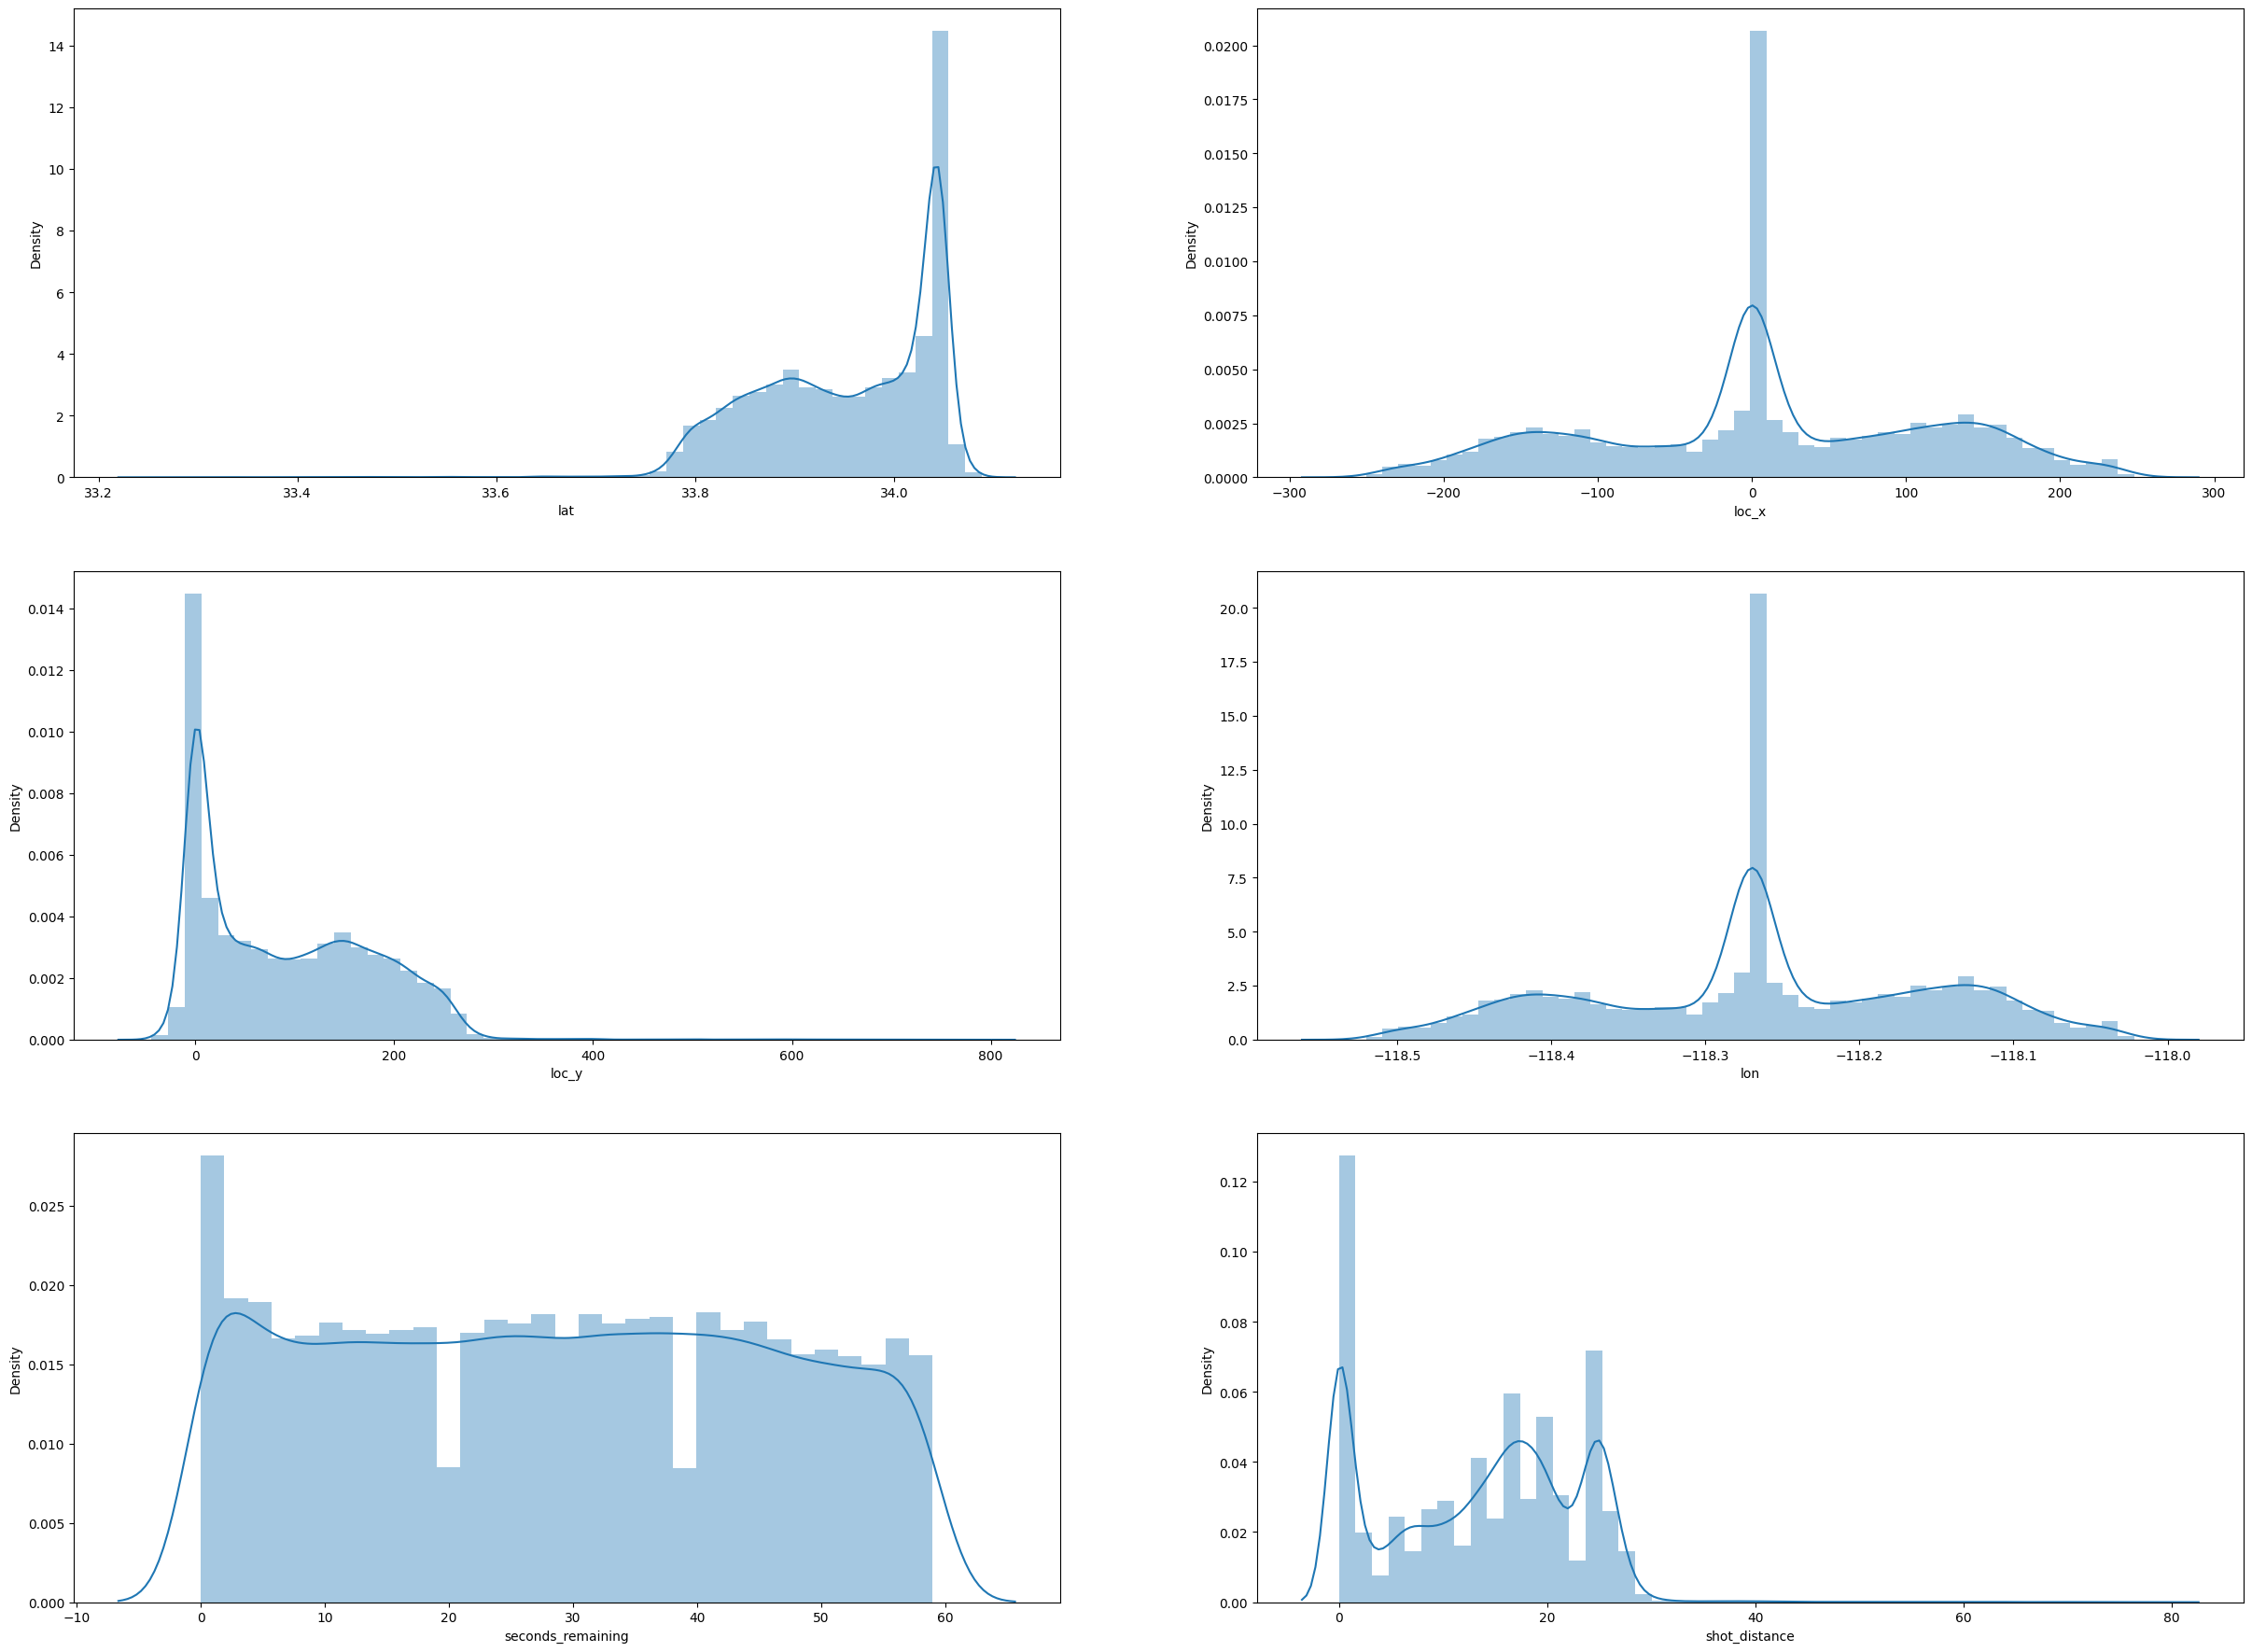

In [8]:
plt.figure(figsize=(30,30))
pltno=1
for col in data[['lat', 'loc_x', 'loc_y', 'lon', 'seconds_remaining', 'shot_distance']]:
  if pltno<=14:
    ax = plt.subplot(4,2,pltno)
    sns.distplot(x=data[col])
    plt.xlabel(col)
  pltno+=1
plt.show()

# Insights
* For latitude data is skewed toward left(Negatively Skewed).
* In loc_y data is skewed toward right(Positively Skewed).
* In shot distance, maximum data is lying between 0 to 30 and getting peakness at 0 and after that we can see gradual rise in graph from 10 to 25.
* For loc_x and longitude data is showing central peakness and data is skewed toward both right and left.
* In Seconds remaining max data is lying between 0 to 58.

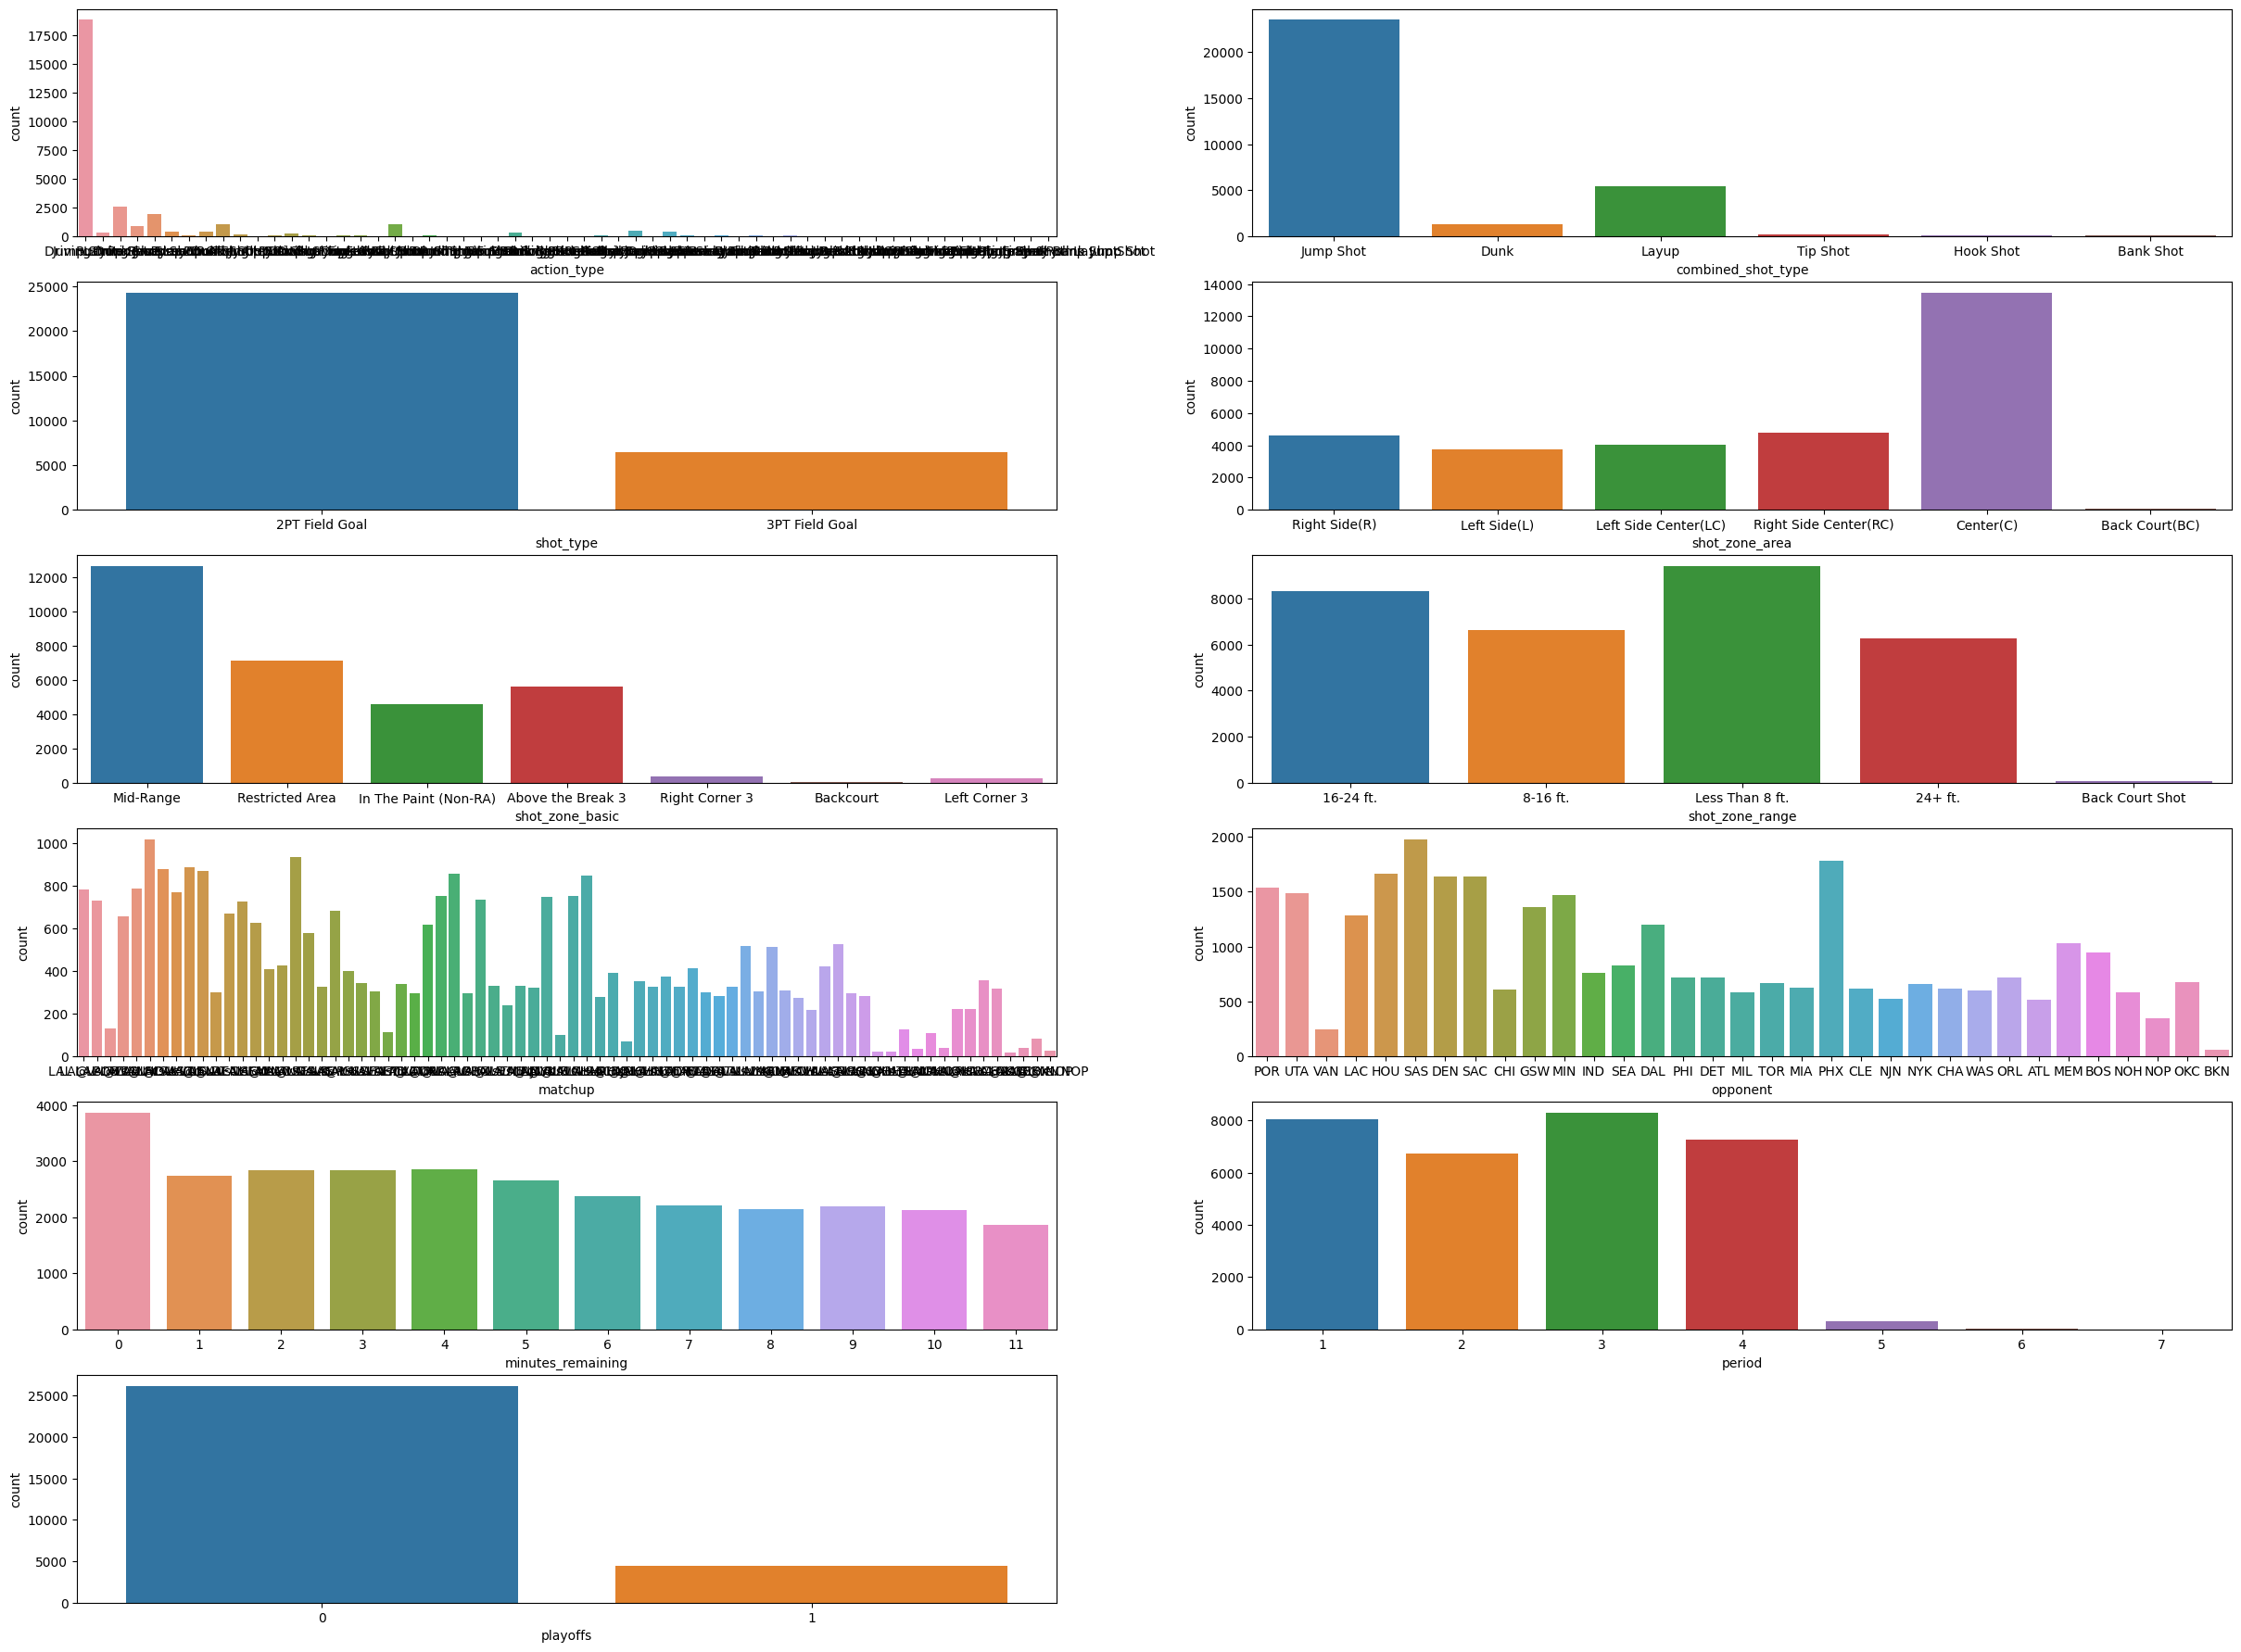

In [9]:
plt.figure(figsize=(30,30))
pltno=1
for col in data[['action_type', 'combined_shot_type', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'matchup', 'opponent','minutes_remaining','period','playoffs']]:
  if pltno<=14:
    ax = plt.subplot(8,2,pltno)
    sns.countplot(x=data[col])
    plt.xlabel(col)
  pltno+=1
plt.show()

# Insights
* In combined shot jump shots are taken mostly and followed by layup ans dunk shots, and tip,hook and bank shots are taken less.
* In shot zone area maximum shots are taken from center. For remaining sides data is realtively equal ranging between 3900 to 4500 except for Back Court(BC).
* In Shot Zone Range more shots are taken from less than 8ft and 16ft to 24ft. And from 8 to 16ft number of shots are equal and for Back Court Shot data is very less.
* In opponets POR, UTA, LAC, HOU, SAS, DEN, SAC, GSW,MIN and PHX played more number of games compared to other teams.
* In period more data is there for 1, 2, 3 and 4 and for 5, 6 and 7 data is very less.
* In shot type data is more for 2PT Field Goal and for 3PT Field Goal data is very less compared to 2PT Field Goal.
* In shot zone basic mid range data is more followe dby restricted area, In the paint and above the break, fro right corner 3, left corner 3 and back court data is very less cmpared to others.
* In minutes remaining data is equally distributed except for 0.
* In playoffs for 0 data is more compared to 1.

2. Bivariate Analysis

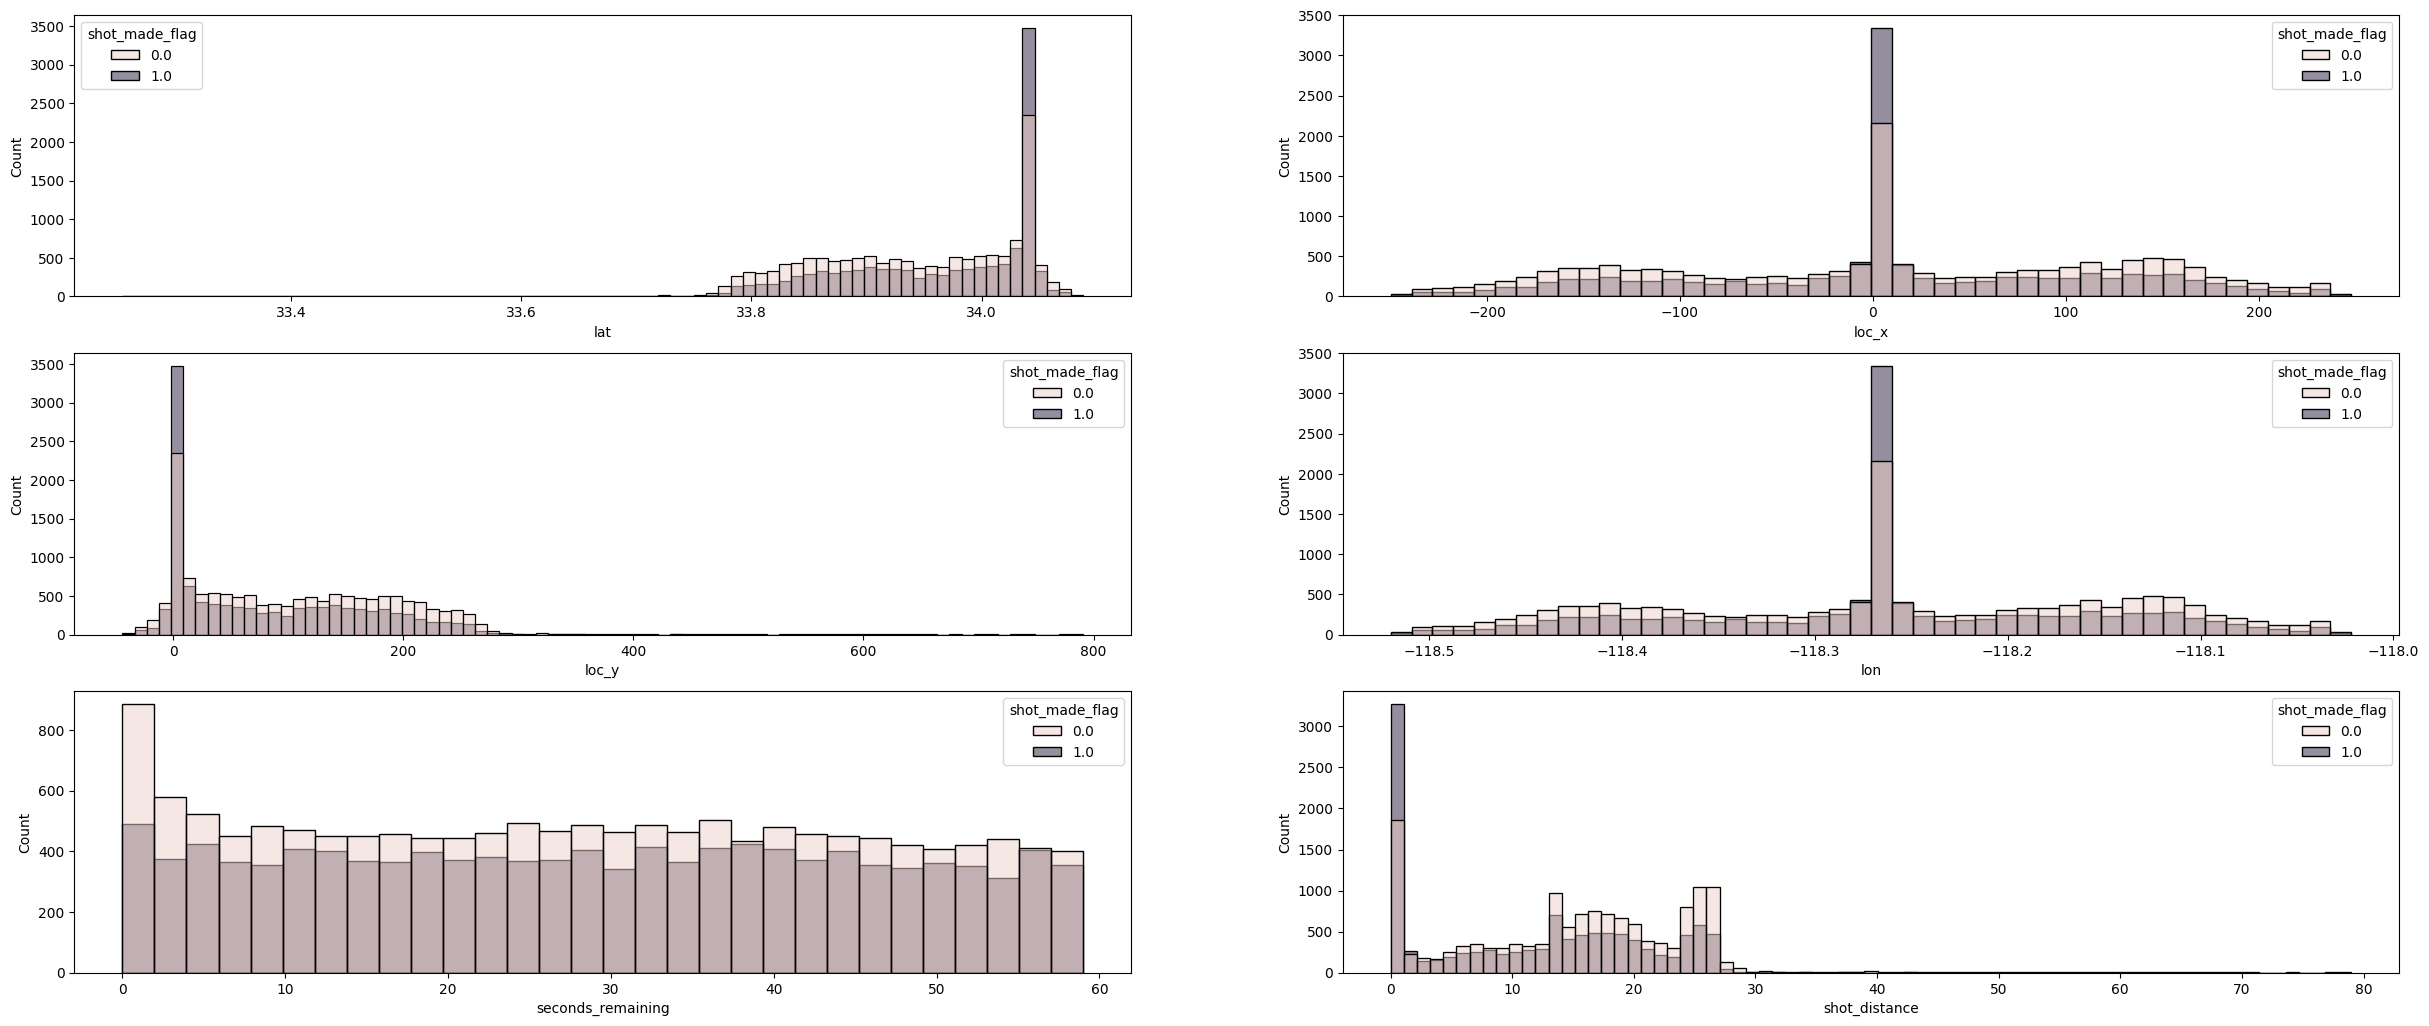

In [10]:
plt.figure(figsize=(30,30))
pltno=1
for col in data[['lat', 'loc_x', 'loc_y', 'lon', 'seconds_remaining', 'shot_distance']]:
  if pltno<=14:
    ax = plt.subplot(7,2,pltno)
    sns.histplot(x=data[col],hue=data['shot_made_flag'])
    plt.xlabel(col)
  pltno+=1
plt.show()

# Insights
* In latitude as latitude increses there is a high chances of shot being made
* In loc_x
* In seconds remaining as more seconds are remaning less number of shots are made.
* For shot distance peakness is there when value is 0 and number of shots made also more for this only, after that we can see some increasing pattern till 28.

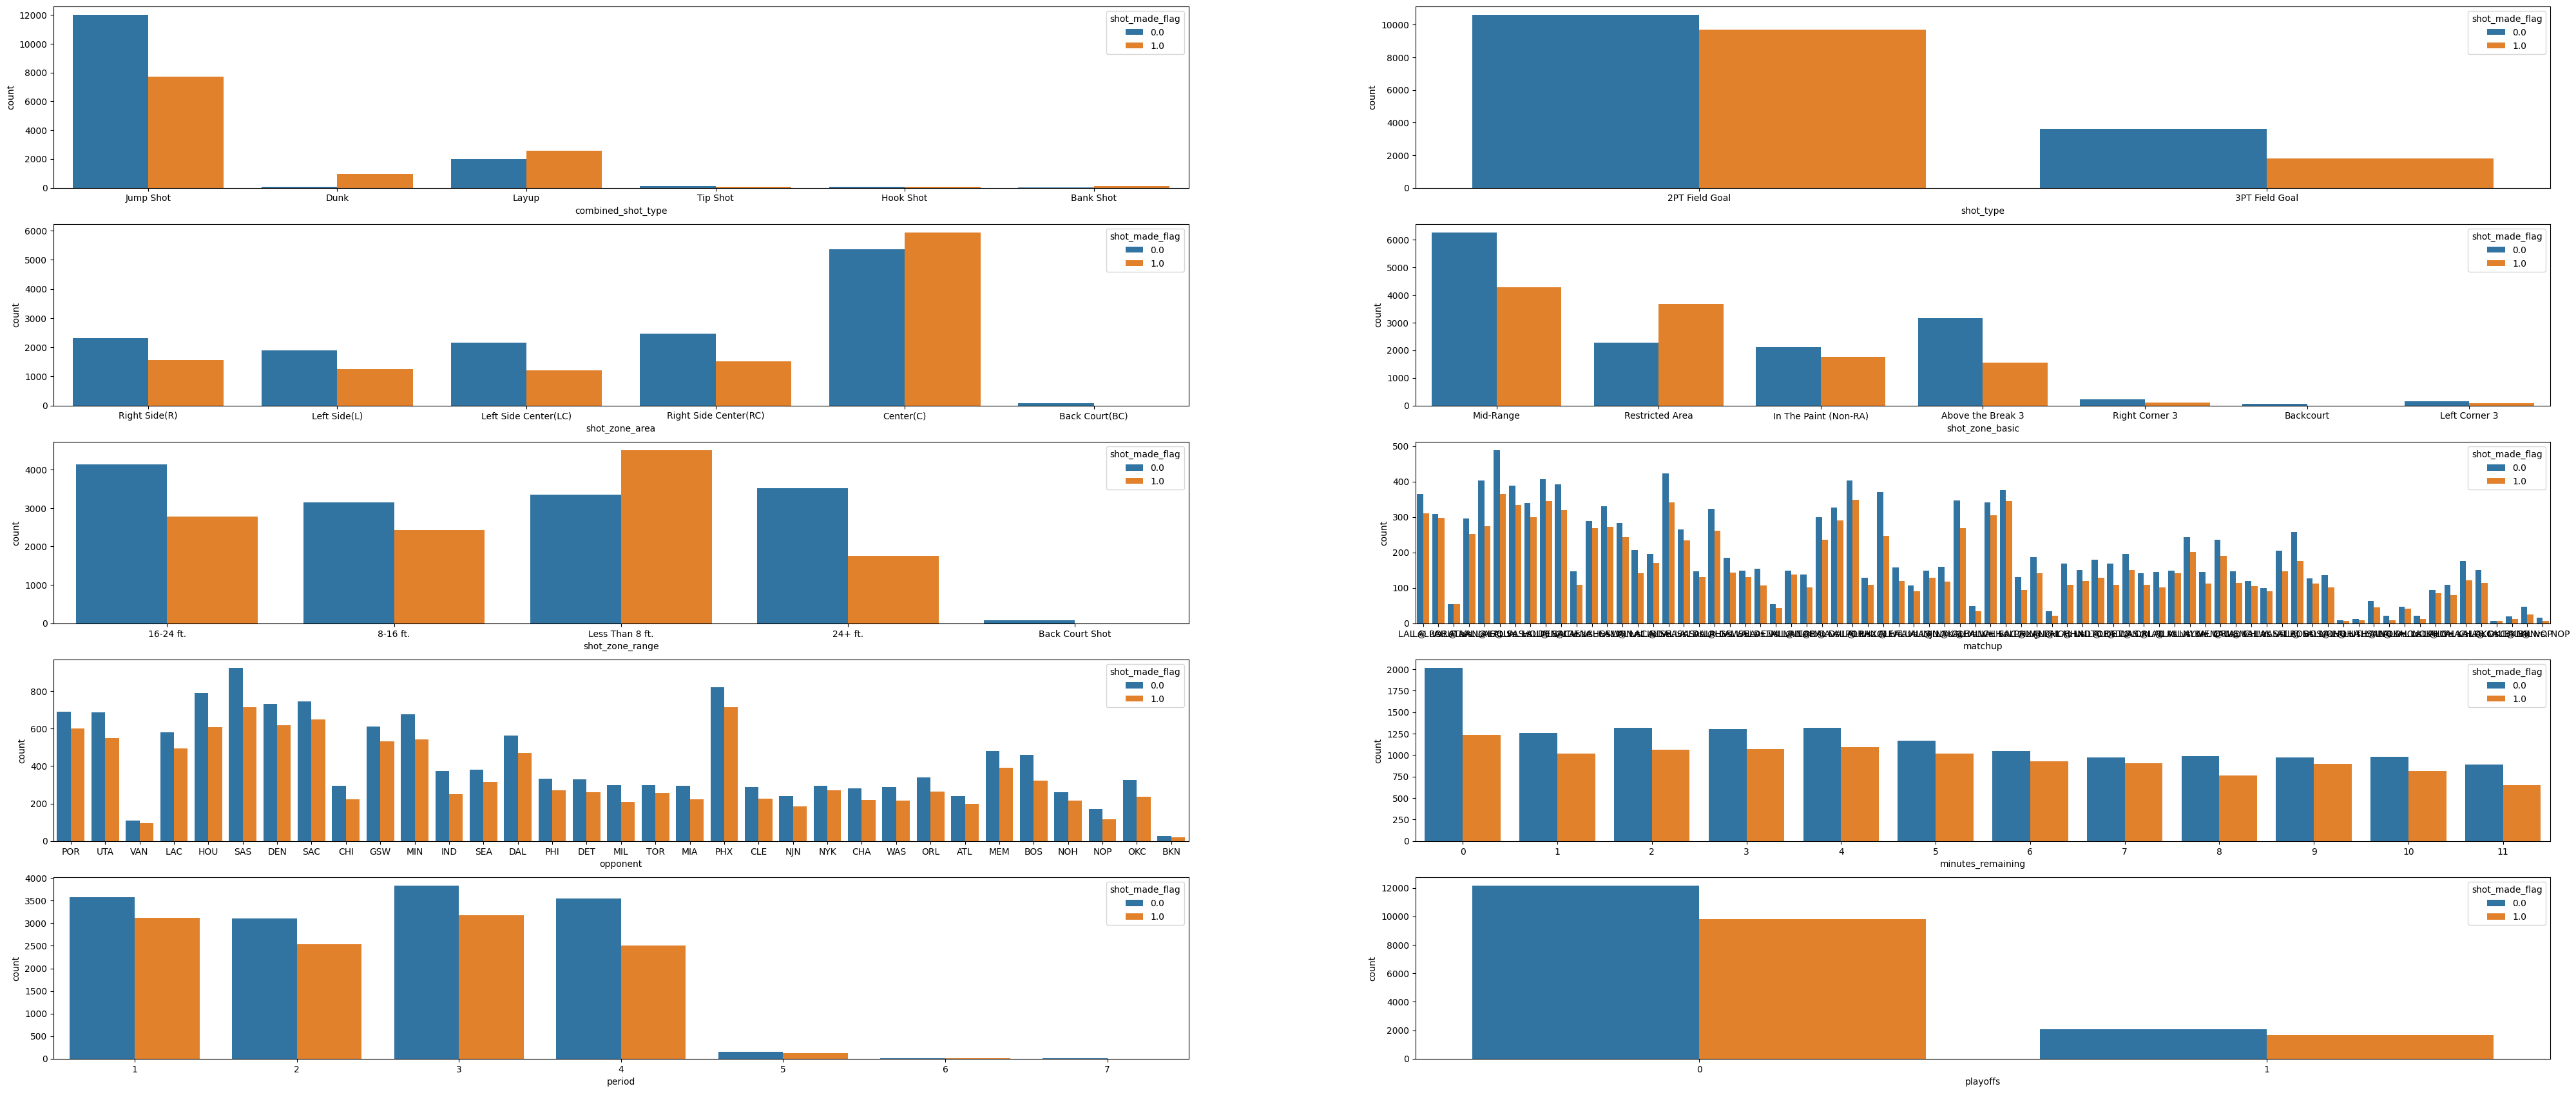

In [11]:
plt.figure(figsize=(50,30))
pltno=1
for col in data[[ 'combined_shot_type', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'matchup', 'opponent','minutes_remaining','period','playoffs']]:
  if pltno<=14:
    ax = plt.subplot(7,2,pltno)
    sns.countplot(x=data[col],hue=data['shot_made_flag'])
    plt.xlabel(col)
  pltno+=1
plt.show()

# Insights
* In combined shot type we can see that for jump shots number of shots taken are more but in that more unsuccesful shots are there but for dunk shots number of shots taken are very less but in that success rate is more compared to jump shot and tip shot, hook shot and bank shot data is very less.
* For shot type in 2PT field goal data is more and succesful shots made is also more for this only as compared to 3PT field goal.
* In shot zone area more data is there for center with more succesfull shots made and for other sucess rate is less.
* In shot zone basic for mid range data is more compared to others with less success rate and for restricted area sucess rate is high compared to others.
* For shot zone range dat is more for less that 8ft with high successfull shots made compared to others.
* In minitues remaining as minitues remaining is increasing number of shots made is less and success rate is also less.
* For period data is more at 1,2,3,4 compared to 5,6,7.
* In playoffs when playoffs is not happening number of shots made are more and success rata is also more.

3. MULTIVARIATE ANALYSIS

<Figure size 4000x4000 with 0 Axes>

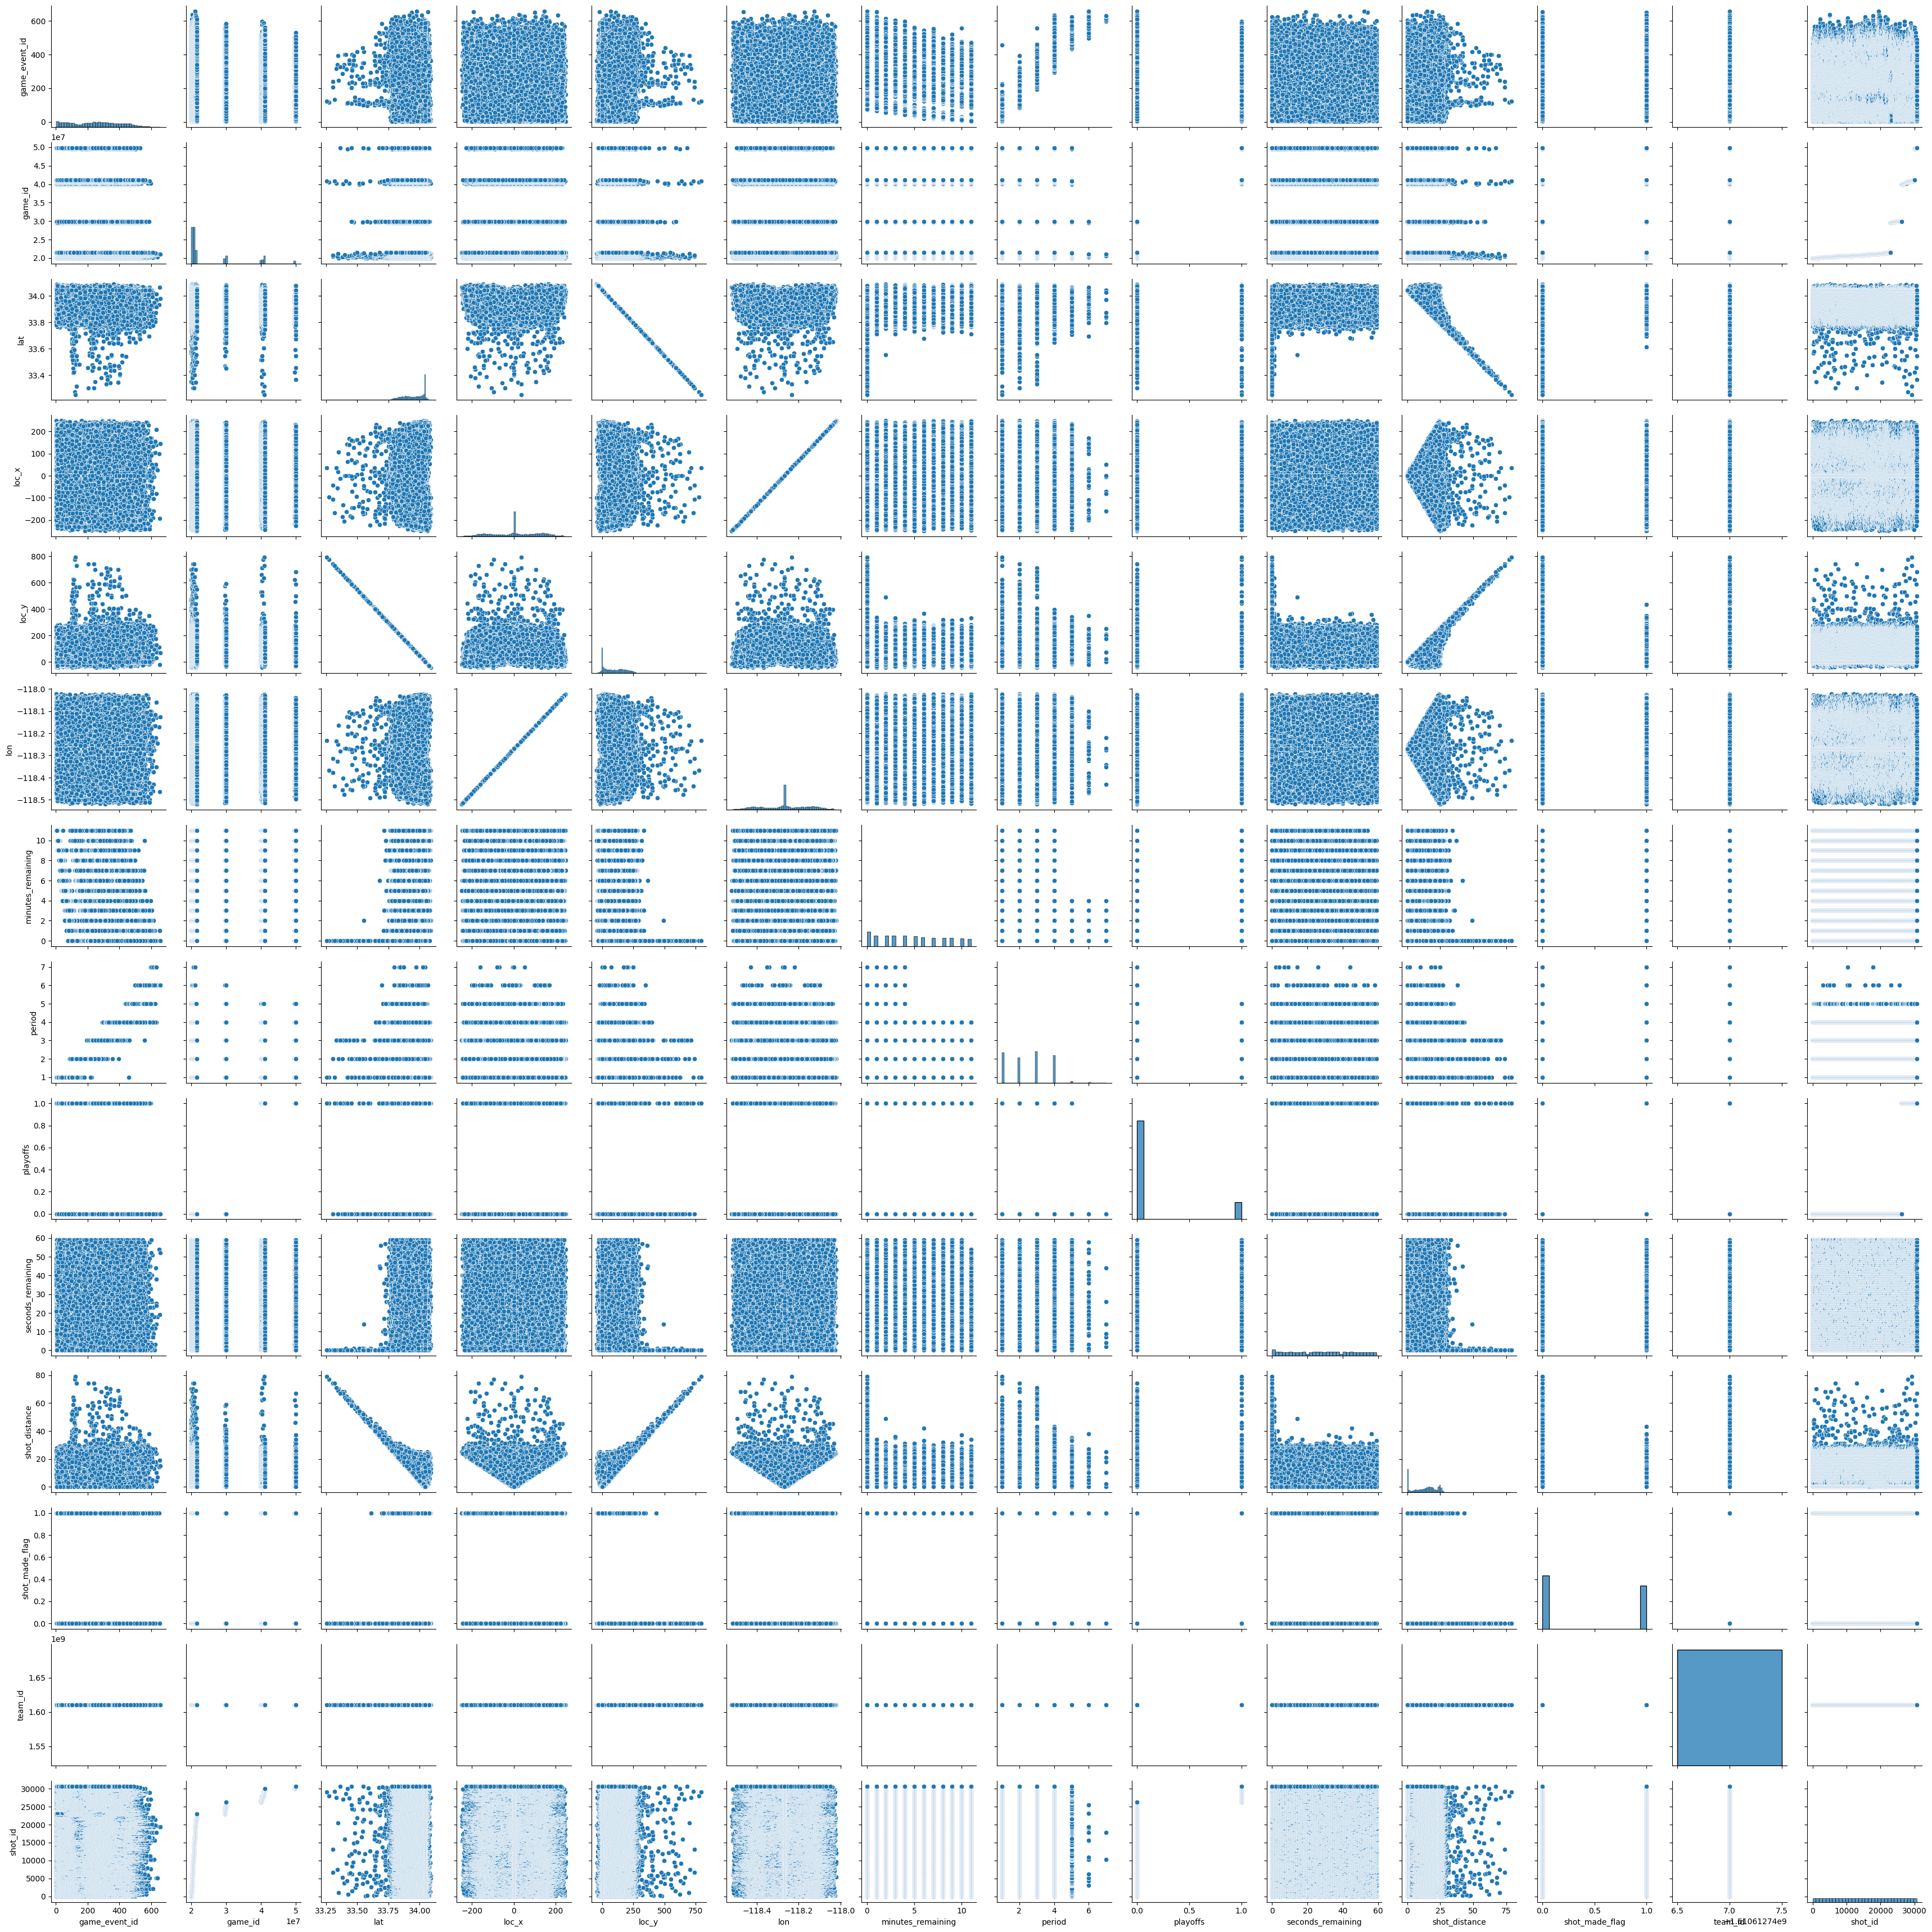

In [12]:
plt.figure(figsize=(40,40),facecolor='white')
sns.pairplot(data)

## DATA PREPROCESSING

In [13]:
data.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.duplicated().sum()

0

#### Encoding

In [16]:
data['action_type'] = data['action_type'].map({'Jump Shot':0, 'Driving Dunk Shot':1, 'Layup Shot':2,
       'Running Jump Shot':3, 'Driving Layup Shot':4, 'Reverse Layup Shot':5,
       'Reverse Dunk Shot':6, 'Slam Dunk Shot':7, 'Turnaround Jump Shot':8,
       'Tip Shot':9, 'Running Hook Shot':10, 'Alley Oop Dunk Shot':11,
       'Dunk Shot':12, 'Alley Oop Layup shot':13, 'Running Dunk Shot':14,
       'Driving Finger Roll Shot':15, 'Running Layup Shot':16,
       'Finger Roll Shot':17, 'Fadeaway Jump Shot':18, 'Follow Up Dunk Shot':19,
       'Hook Shot':20, 'Turnaround Hook Shot':21, 'Running Tip Shot':22,
       'Jump Hook Shot':23, 'Running Finger Roll Shot':24, 'Jump Bank Shot':25,
       'Turnaround Finger Roll Shot':26, 'Hook Bank Shot':27,
       'Driving Hook Shot':28, 'Running Reverse Layup Shot':29,
       'Driving Finger Roll Layup Shot':30, 'Fadeaway Bank shot':31,
       'Pullup Jump shot':32, 'Finger Roll Layup Shot':33,
       'Turnaround Fadeaway shot':34, 'Driving Reverse Layup Shot':35,
       'Driving Slam Dunk Shot':36, 'Step Back Jump shot':37,
       'Reverse Slam Dunk Shot':38, 'Turnaround Bank shot':39,
       'Running Finger Roll Layup Shot':40, 'Floating Jump shot':41,
       'Putback Slam Dunk Shot':42, 'Running Bank shot':43, 'Driving Bank shot':44,
       'Putback Layup Shot':45, 'Driving Jump shot':46, 'Putback Dunk Shot':47,
       'Pullup Bank shot':48, 'Running Slam Dunk Shot':49, 'Cutting Layup Shot':50,
       'Driving Floating Jump Shot':51, 'Running Pull-Up Jump Shot':52,
       'Tip Layup Shot':53, 'Driving Floating Bank Jump Shot':54,
       'Turnaround Fadeaway Bank Jump Shot':55,
       'Cutting Finger Roll Layup Shot':56})

In [17]:
data['combined_shot_type'] = data['combined_shot_type'].map({'Jump Shot': 0, 'Dunk': 1, 'Layup': 2, 'Tip Shot': 3, 'Hook Shot': 4, 'Bank Shot': 5})


In [18]:
data['shot_type'] = data['shot_type'].map({'2PT Field Goal': 0, '3PT Field Goal': 1})

In [19]:
data['shot_zone_area'] = data['shot_zone_area'].map({'Center(C)': 0, 'Left Side Center(LC)': 1, 'Right Side Center(RC)': 2, 'Left Side(L)': 3, 'Right Side(R)': 4, 'Back Court(BC)': 5})

In [20]:
data['shot_zone_basic'] = data['shot_zone_basic'].map({'Restricted Area': 0, 'In The Paint (Non-RA)': 1, 'Mid-Range': 2, 'Above the Break 3': 3, 'Right Corner 3': 4, 'Left Corner 3': 5, 'Backcourt': 6})

In [21]:
data['shot_zone_range'] = data['shot_zone_range'].map({'Less Than 8 ft.': 0, '8-16 ft.': 1, '16-24 ft.': 2, '24+ ft.': 3, 'Back Court Shot': 4})

In [22]:
data['team_name'] = data['team_name'].map({'Los Angeles Lakers' : 0})

In [23]:
label = LabelEncoder()
data['opponent'] = label.fit_transform(data['opponent'])

In [24]:
data['matchup'] = label.fit_transform(data['matchup'])

In [25]:
data['season'] = label.fit_transform(data['season'])

In [26]:
data['game_date'] = label.fit_transform(data['game_date'])

In [27]:
data

action_type  combined_shot_type  game_event_id   game_id      lat  \
1                0                   0             12  20000012  34.0443   
2                0                   0             35  20000012  33.9093   
3                0                   0             43  20000012  33.8693   
4                1                   1            155  20000012  34.0443   
5                0                   0            244  20000012  34.0553   
...            ...                 ...            ...       ...      ...   
30691            4                   2            382  49900088  34.0443   
30692            0                   0            397  49900088  33.9963   
30694            3                   0            426  49900088  33.8783   
30695            0                   0            448  49900088  33.7773   
30696            0                   0            471  49900088  33.9723   

       loc_x  loc_y       lon  minutes_remaining  period  ...  shot_type  \
1       -157      0 -118.4268                 10       1  ...          0   
2       -101    135 -118.3708                  7       1  ...          0   
3        138    175 -118.1318                  6       1  ...          0   
4          0      0 -118.2698                  6       2  ...          0   
5       -145    -11 -118.4148                  9       3  ...          0   
...      ...    ...       ...                ...     ...  ...        ...   
30691      0      0 -118.2698                  7       4  ...          0   
30692      1     48 -118.2688                  6       4  ...          0   
30694   -134    166 -118.4038                  3       4  ...          0   
30695     31    267 -118.2388                  2       4  ...          1   
30696      1     72 -118.2688                  0       4  ...          0   

       shot_zone_area  shot_zone_basic  shot_zone_range     team_id  \
1                   3                2                1  1610612747   
2                   1                2                2  1610612747   
3                   2                2                2  1610612747   
4                   0                0                0  1610612747   
5                   3                2                1  1610612747   
...               ...              ...              ...         ...   
30691               0                0                0  1610612747   
30692               0                1                0  1610612747   
30694               1                2                2  1610612747   
30695               0                3                3  1610612747   
30696               0                1                0  1610612747   

       team_name  game_date  matchup  opponent  shot_id  
1              0        309       28        25        2  
2              0        309       28        25        3  
3              0        309       28        25        4  
4              0        309       28        25        5  
5              0        309       28        25        6  
...          ...        ...      ...       ...      ...  
30691          0        308       49        11    30692  
30692          0        308       49        11    30693  
30694          0        308       49        11    30695  
30695          0        308       49        11    30696  
30696          0        308       49        11    30697  

[25697 rows x 25 columns]

In [28]:
# Scaling The Data
scale = MinMaxScaler()
df = scale.fit_transform(data)

In [29]:
data.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [30]:
df1 = pd.DataFrame(df,columns=['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'])

In [31]:
df1

action_type  combined_shot_type  game_event_id  game_id       lat  \
0         0.000000                 0.0       0.015361      0.0  0.947305   
1         0.000000                 0.0       0.050691      0.0  0.785629   
2         0.000000                 0.0       0.062980      0.0  0.737725   
3         0.018519                 0.2       0.235023      0.0  0.947305   
4         0.000000                 0.0       0.371736      0.0  0.960479   
...            ...                 ...            ...      ...       ...   
25692     0.074074                 0.4       0.583717      1.0  0.947305   
25693     0.000000                 0.0       0.606759      1.0  0.889820   
25694     0.055556                 0.0       0.651306      1.0  0.748503   
25695     0.000000                 0.0       0.685100      1.0  0.627545   
25696     0.000000                 0.0       0.720430      1.0  0.861078   

          loc_x     loc_y       lon  minutes_remaining    period  ...  \
0      0.186747  0.052695  0.186747           0.909091  0.000000  ...   
1      0.299197  0.214371  0.299197           0.636364  0.000000  ...   
2      0.779116  0.262275  0.779116           0.545455  0.000000  ...   
3      0.502008  0.052695  0.502008           0.545455  0.166667  ...   
4      0.210843  0.039521  0.210843           0.818182  0.333333  ...   
...         ...       ...       ...                ...       ...  ...   
25692  0.502008  0.052695  0.502008           0.636364  0.500000  ...   
25693  0.504016  0.110180  0.504016           0.545455  0.500000  ...   
25694  0.232932  0.251497  0.232932           0.272727  0.500000  ...   
25695  0.564257  0.372455  0.564257           0.181818  0.500000  ...   
25696  0.504016  0.138922  0.504016           0.000000  0.500000  ...   

       shot_type  shot_zone_area  shot_zone_basic  shot_zone_range  team_id  \
0            0.0             0.6         0.333333             0.25      0.0   
1            0.0             0.2         0.333333             0.50      0.0   
2            0.0             0.4         0.333333             0.50      0.0   
3            0.0             0.0         0.000000             0.00      0.0   
4            0.0             0.6         0.333333             0.25      0.0   
...          ...             ...              ...              ...      ...   
25692        0.0             0.0         0.000000             0.00      0.0   
25693        0.0             0.0         0.166667             0.00      0.0   
25694        0.0             0.2         0.333333             0.50      0.0   
25695        1.0             0.0         0.500000             0.75      0.0   
25696        0.0             0.0         0.166667             0.00      0.0   

       team_name  game_date   matchup  opponent   shot_id  
0            0.0   0.198459  0.383562   0.78125  0.000000  
1            0.0   0.198459  0.383562   0.78125  0.000033  
2            0.0   0.198459  0.383562   0.78125  0.000065  
3            0.0   0.198459  0.383562   0.78125  0.000098  
4            0.0   0.198459  0.383562   0.78125  0.000130  
...          ...        ...       ...       ...       ...  
25692        0.0   0.197816  0.671233   0.34375  0.999837  
25693        0.0   0.197816  0.671233   0.34375  0.999870  
25694        0.0   0.197816  0.671233   0.34375  0.999935  
25695        0.0   0.197816  0.671233   0.34375  0.999967  
25696        0.0   0.197816  0.671233   0.34375  1.000000  

[25697 rows x 25 columns]

<Axes: >

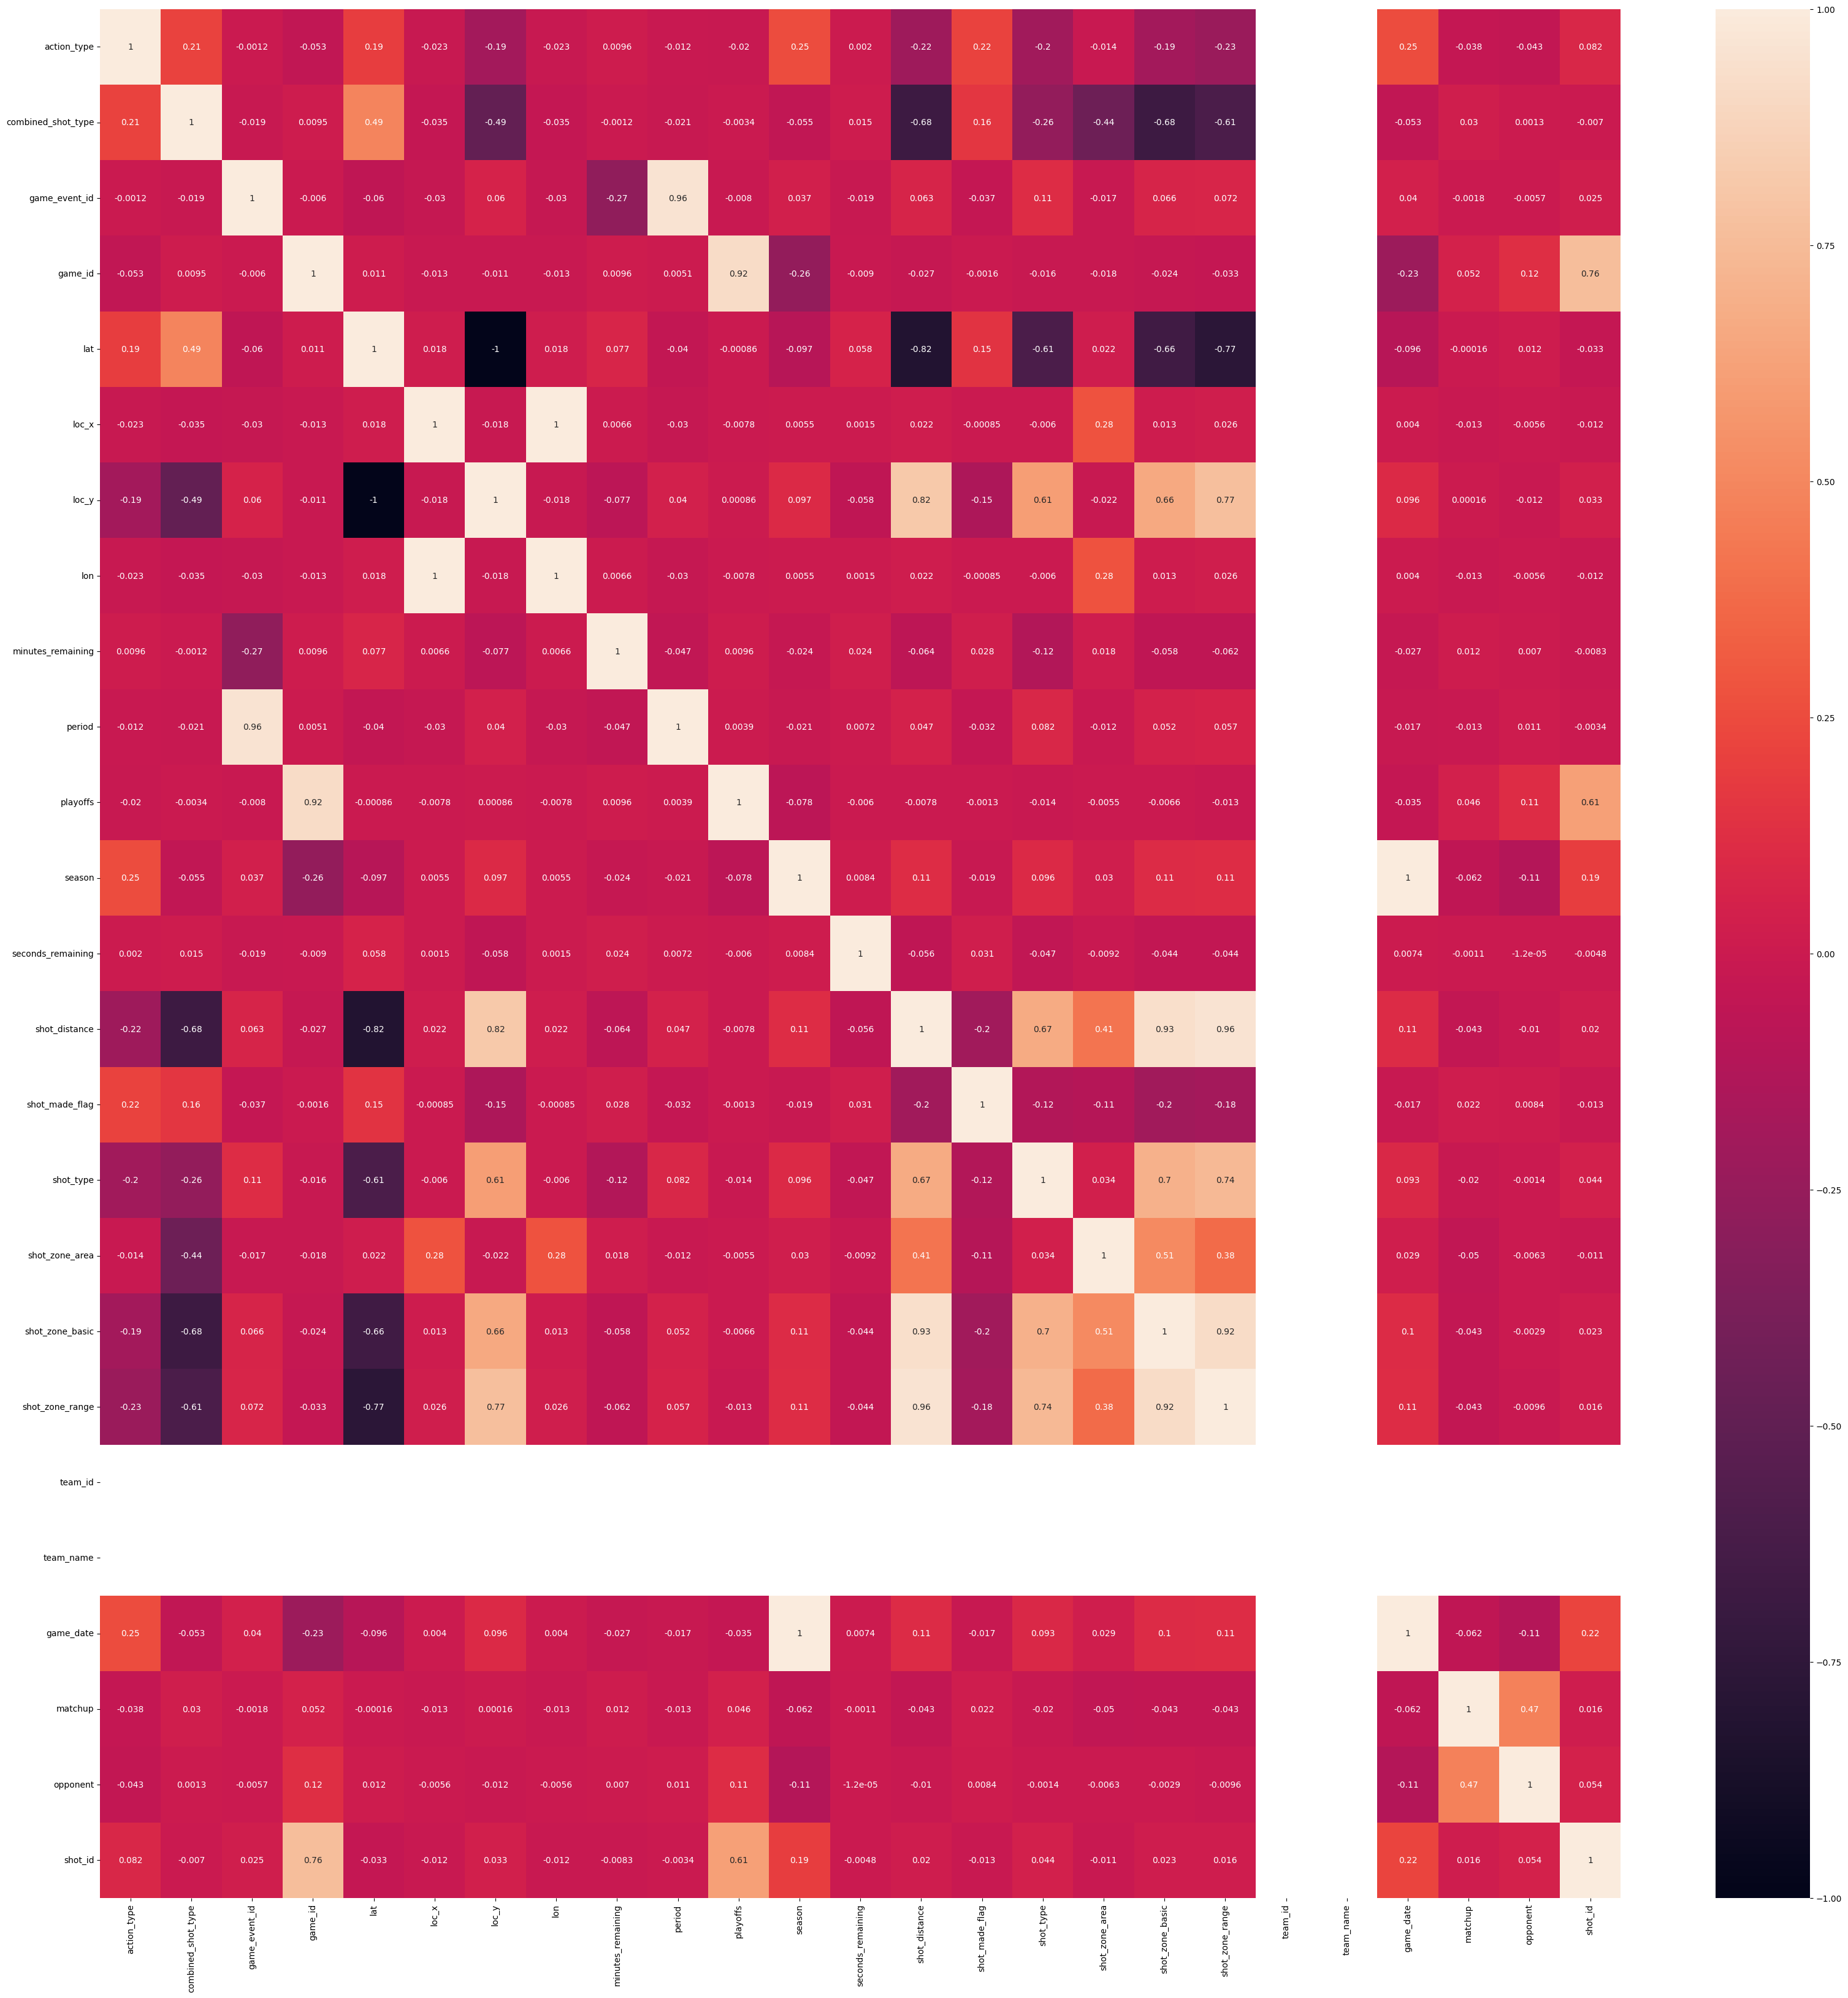

In [32]:
plt.figure(figsize=(40,40),facecolor='white')
sns.heatmap(df1.corr(),annot=True)

In [33]:
df1.drop(['team_id','team_name','game_date','shot_zone_basic','lon','game_event_id','shot_zone_range','game_id'],axis=1,inplace=True)

<Axes: >

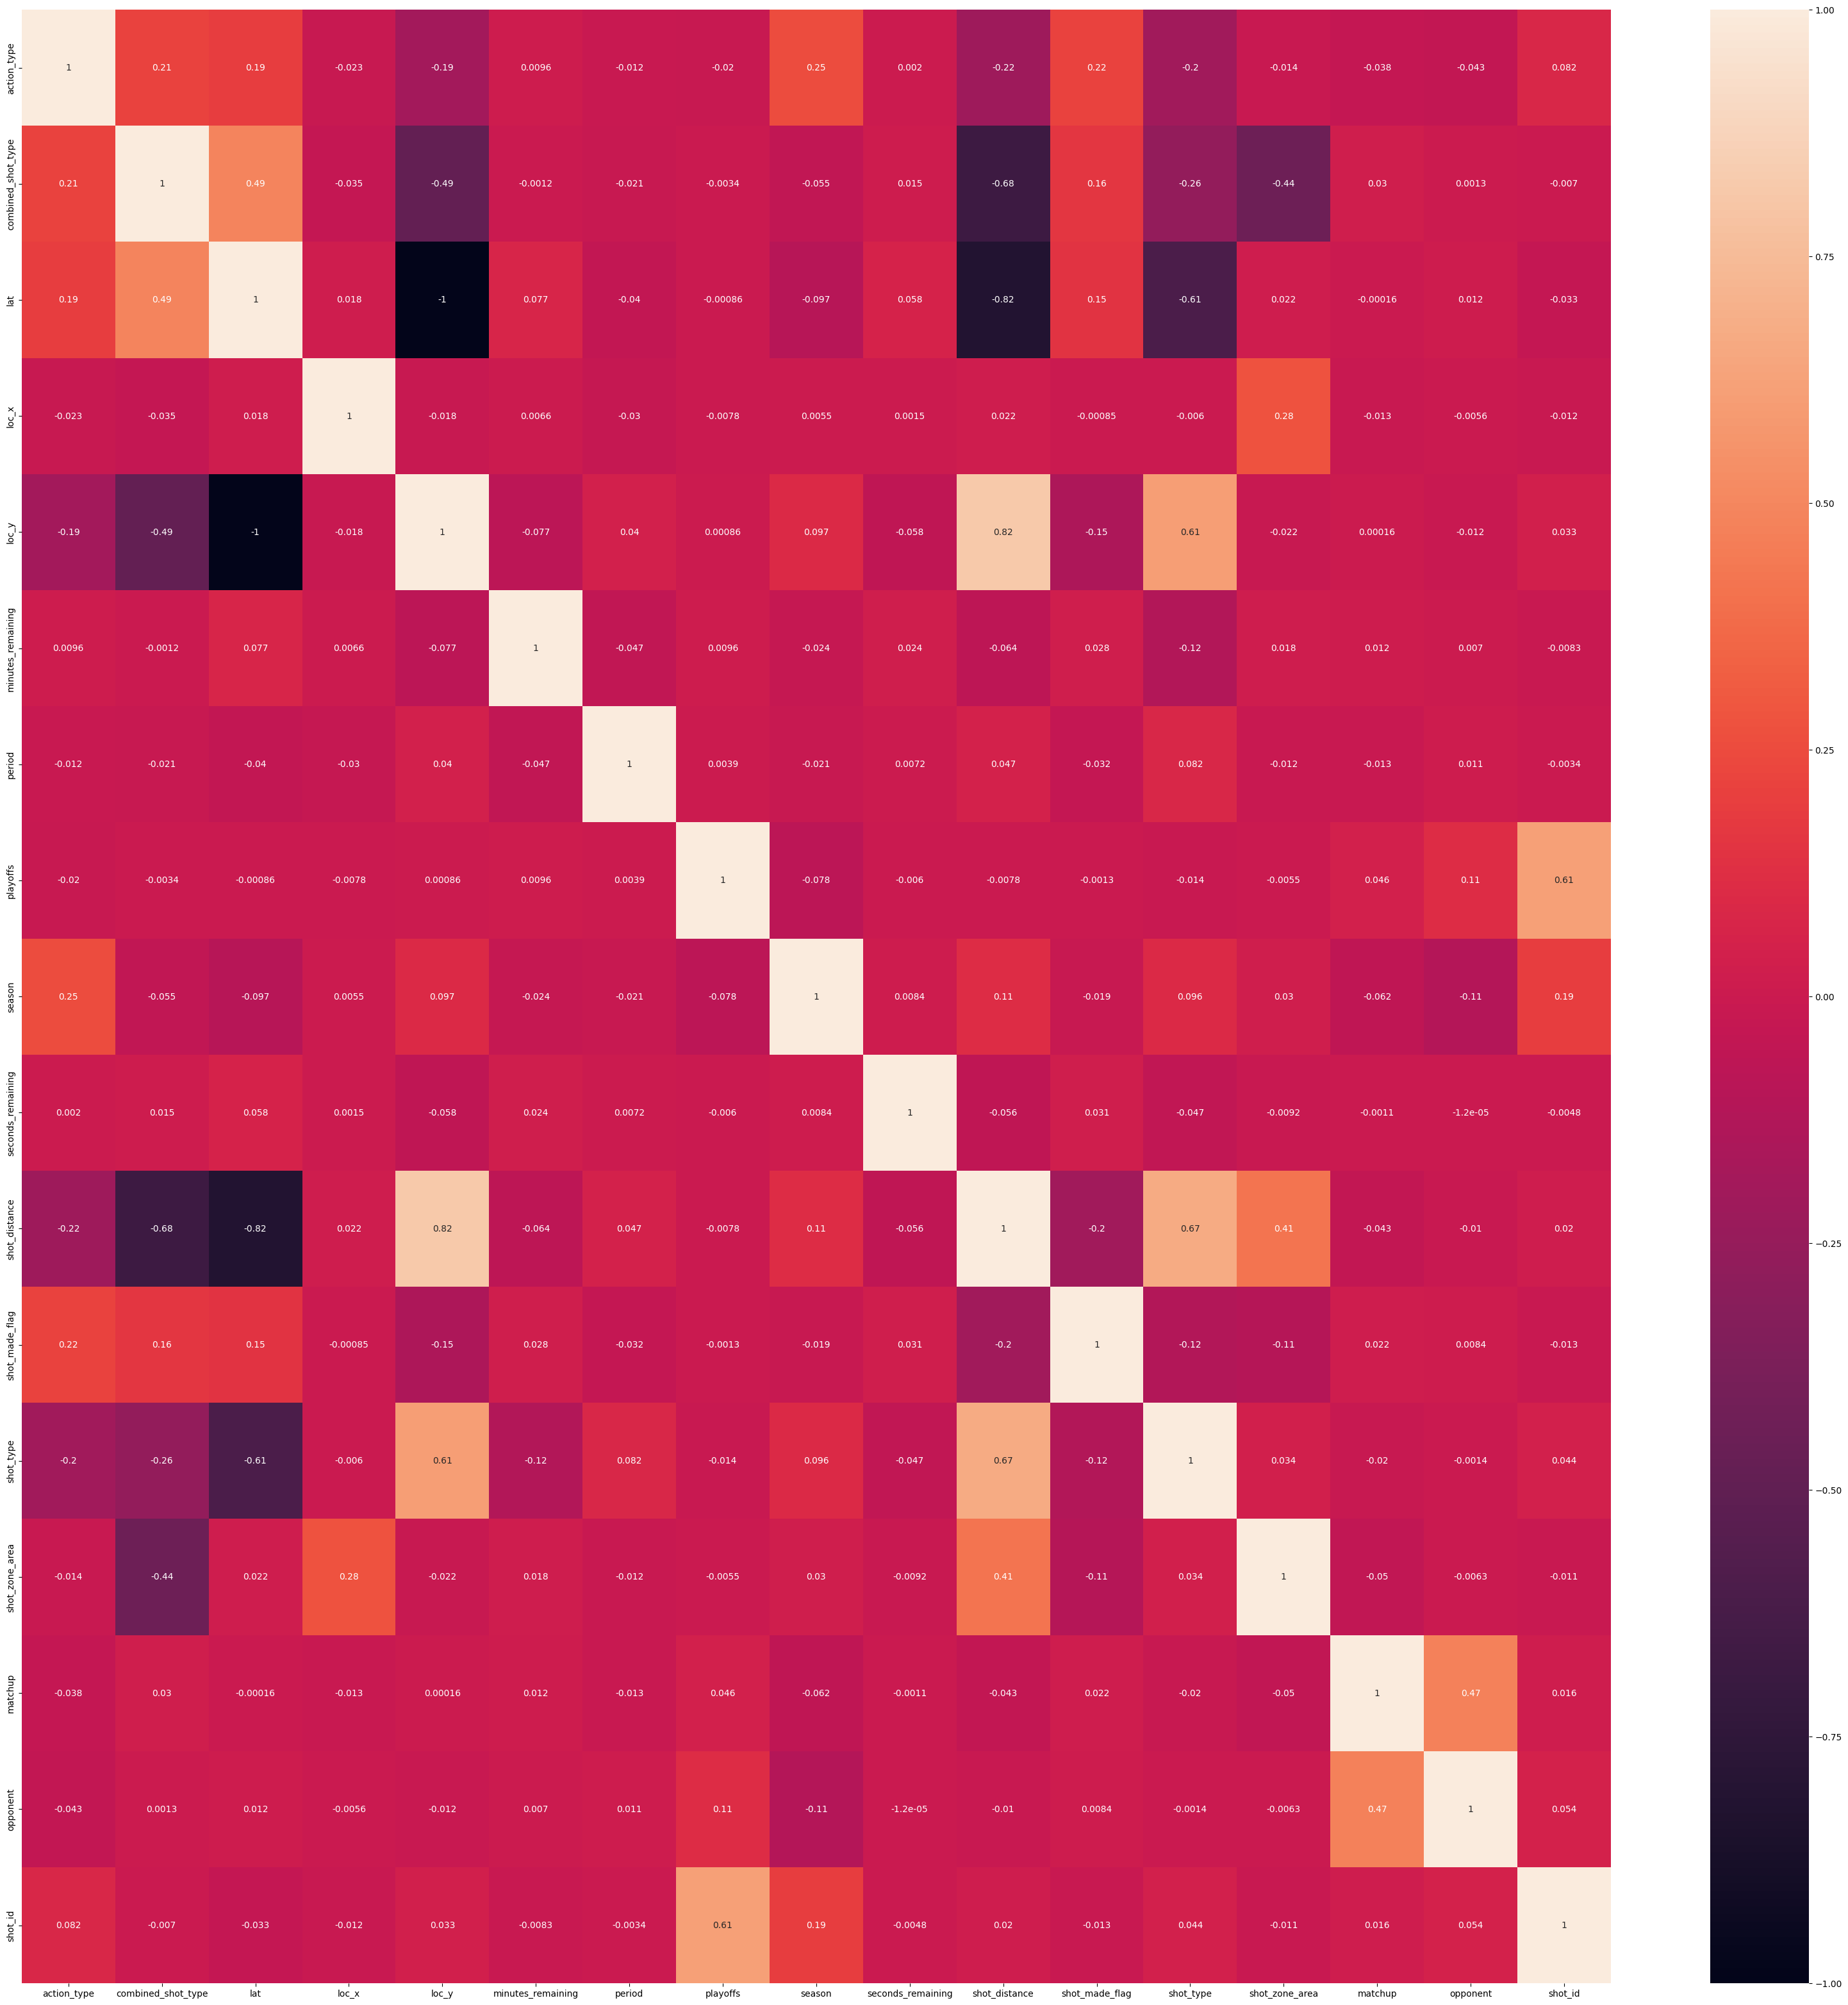

In [34]:
plt.figure(figsize=(40,40),facecolor='white')
sns.heatmap(df1.corr(),annot=True)

In [35]:
df1.shot_made_flag.value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

# Task - 2 & 3

## MODEL CREATION

In [36]:
x = df1.drop(['shot_made_flag'],axis=1)
y = data['shot_made_flag']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [38]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)

x_sampled,y_sampled = oversample.fit_resample(x_train,y_train)

In [39]:
x_sampled

action_type  combined_shot_type       lat     loc_x     loc_y  \
0         0.148148            0.000000  0.956886  0.148594  0.043114   
1         0.037037            0.400000  0.947305  0.502008  0.052695   
2         0.629630            0.000000  0.846707  0.333333  0.153293   
3         0.037037            0.400000  0.947305  0.502008  0.052695   
4         0.685185            0.000000  0.750898  0.648594  0.249102   
...            ...                 ...       ...       ...       ...   
21265     0.000000            0.000000  0.771264  0.741356  0.228736   
21266     0.000000            0.000000  0.701006  0.596520  0.298994   
21267     0.834247            0.395069  0.943801  0.535303  0.056199   
21268     0.599371            0.000000  0.898807  0.726002  0.101193   
21269     0.000000            0.000000  0.754575  0.861354  0.245425   

       minutes_remaining    period  playoffs    season  seconds_remaining  \
0               0.454545  0.000000       0.0  0.368421           0.186441   
1               0.454545  0.333333       0.0  0.684211           0.813559   
2               0.636364  0.166667       1.0  0.578947           0.576271   
3               0.818182  0.500000       1.0  0.684211           0.203390   
4               0.545455  0.000000       0.0  0.789474           0.966102   
...                  ...       ...       ...       ...                ...   
21265           0.302677  0.333333       0.0  0.508670           0.079261   
21266           0.890814  0.155497       0.0  0.484266           0.444086   
21267           0.634122  0.000000       0.0  0.735544           0.343580   
21268           0.380275  0.333333       0.0  0.779841           0.227982   
21269           0.000000  0.357909       0.0  0.834345           0.313446   

       shot_distance  shot_type  shot_zone_area   matchup  opponent   shot_id  
0           0.215190        0.0             0.6  0.246575  0.531250  0.188011  
1           0.000000        0.0             0.0  0.109589  0.218750  0.491155  
2           0.139241        0.0             0.6  0.027397  0.062500  0.925265  
3           0.000000        0.0             0.0  0.534247  0.062500  0.957680  
4           0.215190        0.0             0.4  0.643836  0.281250  0.594722  
...              ...        ...             ...       ...       ...       ...  
21265       0.236188        0.0             0.4  0.858501  0.729227  0.305058  
21266       0.264126        0.0             0.0  0.684932  0.375000  0.319994  
21267       0.012346        0.0             0.0  0.264665  0.570976  0.565973  
21268       0.149582        0.0             0.8  0.176738  0.371933  0.610400  
21269       0.303797        1.0             0.4  0.220757  0.472353  0.670730  

[21270 rows x 16 columns]

In [40]:
# Assuming x_train, y_train, x_test, and y_test are already defined
# You can replace them with your actual training and testing data
x = x_sampled
y = y_sampled
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)
def run_multipe_algorithms(x_train, y_train, x_test, y_test, models):
    results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(x_train, y_train)

        # Make predictions
        y_pred = model.predict(x_test)

        # Calculate accuracy and f1-score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Perform cross-validation
        cross_val_scores = cross_val_score(model, x_train, y_train, cv=5)

        # Store results in the dictionary
        results[model_name] = {
            'accuracy': accuracy,
            'f1-score': f1,
            'cross_val_score': cross_val_scores.mean()
        }

    return results

model_to_run = {
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'neighbors':KNeighborsClassifier(),
    'decisiontree':DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier()
}

results = run_multipe_algorithms(x_train, y_train, x_test, y_test, model_to_run)

# Print the results
for model, scores in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {scores['accuracy']}")
    print(f"F1 Score: {scores['f1-score']}")
    print(f"Cross-validation scores: {scores['cross_val_score']}")
    print('=' * 30)


Model: LogisticRegression
Accuracy: 0.6220383602858217
F1 Score: 0.5919610231425091
Cross-validation scores: 0.6238080848467821
Model: SVM
Accuracy: 0.6321925535915758
F1 Score: 0.5740418118466899
Cross-validation scores: 0.6285726607651417
Model: neighbors
Accuracy: 0.6043625423091388
F1 Score: 0.6135194709772227
Cross-validation scores: 0.5880768108581247
Model: decisiontree
Accuracy: 0.6015419330575404
F1 Score: 0.6014669926650367
Cross-validation scores: 0.6089521960765436
Model: RandomForest
Accuracy: 0.6871004136893569
F1 Score: 0.659852820932134
Cross-validation scores: 0.6881268536410692
Model: XGBClassifier
Accuracy: 0.6822113576532531
F1 Score: 0.6526921496095356
Cross-validation scores: 0.680917195600086


In [41]:
pd.DataFrame(results).T

accuracy  f1-score  cross_val_score
LogisticRegression  0.622038  0.591961         0.623808
SVM                 0.632193  0.574042         0.628573
neighbors           0.604363  0.613519         0.588077
decisiontree        0.601542  0.601467         0.608952
RandomForest        0.687100  0.659853         0.688127
XGBClassifier       0.682211  0.652692         0.680917

## Applying HyperParams

In [42]:
# Assuming x_sampled, y_sampled are defined earlier
x = x_sampled
y = y_sampled

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

# Define a function to run multiple algorithms
def run_multiple_algorithms(x_train, y_train, x_test, y_test, models):
    results = {}

    for model_name, (model_class, hyperparams) in models.items():
        # Initialize the model with hyperparameters
        model = model_class(**hyperparams)

        # Train the model
        model.fit(x_train, y_train)

        # Make predictions
        y_pred = model.predict(x_test)

        # Calculate accuracy and f1-score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Perform cross-validation
        cross_val_scores = cross_val_score(model, x_train, y_train, cv=5)

        # Store results in the dictionary
        results[model_name] = {
            'accuracy': accuracy,
            'f1-score': f1,
            'cross_val_score': cross_val_scores.mean()
        }

    return results

# Define models along with their hyperparameters
model_to_run = {
    'LogisticRegression': (LogisticRegression, {'C': 0.1, 'solver': 'liblinear'}),
    'SVM': (SVC, {'kernel': 'linear', 'C': 1.0}),
    'KNeighbors': (KNeighborsClassifier, {'n_neighbors': 5}),
    'DecisionTree': (DecisionTreeClassifier, {'max_depth': 5}),
    'RandomForest': (RandomForestClassifier, {'n_estimators': 100, 'max_depth': 5}),
    'XGBClassifier': (XGBClassifier, {'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100})
}

# Obtain results
results = run_multiple_algorithms(x_train, y_train, x_test, y_test, model_to_run)

# Print the results
for model, scores in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {scores['accuracy']}")
    print(f"F1 Score: {scores['f1-score']}")
    print(f"Cross-validation scores: {scores['cross_val_score']}")
    print('=' * 30)


Model: LogisticRegression
Accuracy: 0.6203459947348627
F1 Score: 0.5895507216914005
Cross-validation scores: 0.6230557141018676
Model: SVM
Accuracy: 0.6239187664535539
F1 Score: 0.550561797752809
Cross-validation scores: 0.6239968209963563
Model: KNeighbors
Accuracy: 0.6043625423091388
F1 Score: 0.6135194709772227
Cross-validation scores: 0.5880768108581247
Model: DecisionTree
Accuracy: 0.6662279052275292
F1 Score: 0.5901639344262295
Cross-validation scores: 0.6690696305930963
Model: RandomForest
Accuracy: 0.6741256111320045
F1 Score: 0.6129104310922493
Cross-validation scores: 0.6703857341720296
Model: XGBClassifier
Accuracy: 0.6934937946596464
F1 Score: 0.6343651861821444
Cross-validation scores: 0.6981566690800636


In [43]:
pd.DataFrame(results).T

accuracy  f1-score  cross_val_score
LogisticRegression  0.620346  0.589551         0.623056
SVM                 0.623919  0.550562         0.623997
KNeighbors          0.604363  0.613519         0.588077
DecisionTree        0.666228  0.590164         0.669070
RandomForest        0.674126  0.612910         0.670386
XGBClassifier       0.693494  0.634365         0.698157

## Applying  Feature Scoring

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')

# learn relationship from training data
fs.fit(data.loc[:, data.columns != 'shot_made_flag'], data['shot_made_flag'])

# transform train input data
X_train_fs = fs.transform(data.loc[:, data.columns != 'shot_made_flag'])

# transform test input data
X_test_fs = fs.transform(data.loc[:, data.columns != 'shot_made_flag'])

# summarize scores
for i in range(len(fs.scores_)):
  print('Feature %s: %f' % (data.loc[:, data.columns != 'shot_made_flag'].columns[i],fs.scores_[i]))

Feature action_type: 1271.412706
Feature combined_shot_type: 659.737203
Feature game_event_id: 35.667636
Feature game_id: 0.066807
Feature lat: 575.986904
Feature loc_x: 0.018457
Feature loc_y: 575.986903
Feature lon: 0.018457
Feature minutes_remaining: 20.656259
Feature period: 26.590380
Feature playoffs: 0.040593
Feature season: 9.062537
Feature seconds_remaining: 24.404752
Feature shot_distance: 1051.117198
Feature shot_type: 384.756732
Feature shot_zone_area: 304.803339
Feature shot_zone_basic: 1025.832830
Feature shot_zone_range: 861.133123
Feature team_id: 0.000000
Feature team_name: 0.000000
Feature game_date: 7.532761
Feature matchup: 12.397449
Feature opponent: 1.816573
Feature shot_id: 4.353629


In [45]:
data.drop(['game_event_id','game_id','loc_x','loc_y','minutes_remaining','period','playoffs','season','seconds_remaining','team_id','team_name','game_date','matchup','opponent','shot_id'],axis=1,inplace=True)

In [46]:
data.drop(['combined_shot_type'],axis=1,inplace=True)

In [47]:
data

action_type      lat       lon  shot_distance  shot_made_flag  \
1                0  34.0443 -118.4268             15             0.0   
2                0  33.9093 -118.3708             16             1.0   
3                0  33.8693 -118.1318             22             0.0   
4                1  34.0443 -118.2698              0             1.0   
5                0  34.0553 -118.4148             14             0.0   
...            ...      ...       ...            ...             ...   
30691            4  34.0443 -118.2698              0             0.0   
30692            0  33.9963 -118.2688              4             0.0   
30694            3  33.8783 -118.4038             21             1.0   
30695            0  33.7773 -118.2388             26             0.0   
30696            0  33.9723 -118.2688              7             0.0   

       shot_type  shot_zone_area  shot_zone_basic  shot_zone_range  
1              0               3                2                1  
2              0               1                2                2  
3              0               2                2                2  
4              0               0                0                0  
5              0               3                2                1  
...          ...             ...              ...              ...  
30691          0               0                0                0  
30692          0               0                1                0  
30694          0               1                2                2  
30695          1               0                3                3  
30696          0               0                1                0  

[25697 rows x 9 columns]

### Model Creation

In [48]:
data.shot_made_flag.value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [49]:
x = data.drop(['shot_made_flag'],axis=1)
y = data['shot_made_flag']

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [51]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)

x_sampled,y_sampled = oversample.fit_resample(x_train,y_train)

In [52]:
# Assuming x_train, y_train, x_test, and y_test are already defined
# You can replace them with your actual training and testing data
x = x_sampled
y = y_sampled
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)
def run_multipe_algorithms(x_train, y_train, x_test, y_test, models):
    results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(x_train, y_train)

        # Make predictions
        y_pred = model.predict(x_test)

        # Calculate accuracy and f1-score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Perform cross-validation
        cross_val_scores = cross_val_score(model, x_train, y_train, cv=5)

        # Store results in the dictionary
        results[model_name] = {
            'accuracy': accuracy,
            'f1-score': f1,
            'cross_val_score': cross_val_scores.mean()
        }

    return results

model_to_run = {
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'neighbors':KNeighborsClassifier(),
    'decisiontree':DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier()
}

results = run_multipe_algorithms(x_train, y_train, x_test, y_test, model_to_run)

# Print the results
for model, scores in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {scores['accuracy']}")
    print(f"F1 Score: {scores['f1-score']}")
    print(f"Cross-validation scores: {scores['cross_val_score']}")
    print('=' * 30)


Model: LogisticRegression
Accuracy: 0.6239187664535539
F1 Score: 0.5741056218057922
Cross-validation scores: 0.6266918812608738
Model: SVM
Accuracy: 0.6263632944716059
F1 Score: 0.5871597756077291
Cross-validation scores: 0.615345274572195
Model: neighbors
Accuracy: 0.625611132004513
F1 Score: 0.6161557740505108
Cross-validation scores: 0.6237459783540895
Model: decisiontree
Accuracy: 0.6084994358781497
F1 Score: 0.6028233498664631
Cross-validation scores: 0.615346139072568
Model: RandomForest
Accuracy: 0.6299360661902971
F1 Score: 0.6261398176291793
Cross-validation scores: 0.6350924278608823
Model: XGBClassifier
Accuracy: 0.6543813463708161
F1 Score: 0.6133782078249895
Cross-validation scores: 0.6451856465431283


In [53]:
pd.DataFrame(results).T

accuracy  f1-score  cross_val_score
LogisticRegression  0.623919  0.574106         0.626692
SVM                 0.626363  0.587160         0.615345
neighbors           0.625611  0.616156         0.623746
decisiontree        0.608499  0.602823         0.615346
RandomForest        0.629936  0.626140         0.635092
XGBClassifier       0.654381  0.613378         0.645186

## Applying PCA

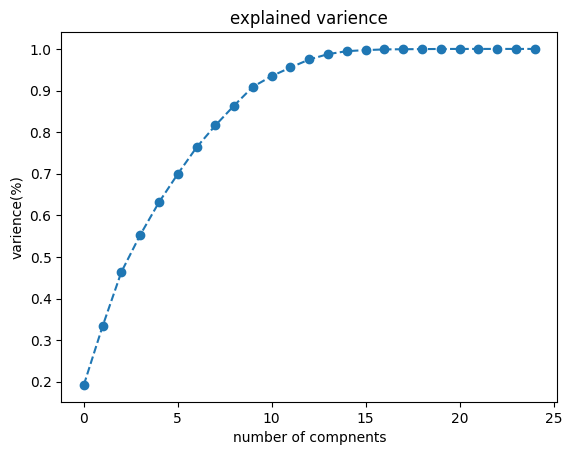

In [54]:
from sklearn.decomposition import PCA

pca = PCA()
principalcomponents = pca.fit_transform(df)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_),linestyle='dashed',marker='o')
plt.xlabel('number of compnents')
plt.ylabel('varience(%)')
plt.title('explained varience')
plt.show()

In [55]:
pca = PCA(n_components=9)

new_data = pca.fit_transform(df)
principal_df = pd.DataFrame(data=new_data,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])

In [56]:
principal_df

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0      0.042469 -0.283623 -0.631499 -0.516419  0.224207  0.038960  0.622108   
1     -0.429203 -0.411378  0.270651 -0.574131  0.071965 -0.023707  0.460221   
2      0.207374 -0.311115 -0.508310 -0.523519  0.486831  0.038779  0.136978   
3     -0.821241 -0.388546  0.044081 -0.508798 -0.103755 -0.076820  0.126311   
4      0.069291 -0.286042 -0.613434 -0.508703  0.112050 -0.016478  0.313183   
...         ...       ...       ...       ...       ...       ...       ...   
25692 -0.295602  1.376744 -0.538398 -0.186102 -0.242719 -0.321599 -0.015244   
25693 -0.149121  1.371924 -0.468344 -0.217892 -0.193201 -0.331305 -0.076249   
25694 -0.355915  1.231871  0.560140 -0.305703 -0.218710 -0.392111 -0.145189   
25695  0.937500  1.308762  0.296253 -0.423237 -0.415756 -0.409859 -0.193231   
25696 -0.111343  1.361187 -0.430333 -0.192645 -0.352723 -0.402446 -0.495309   

            pc8       pc9  
0     -0.124200  0.425892  
1      0.249773  0.190544  
2      0.365215 -0.242523  
3     -0.187381 -0.154495  
4      0.097163  0.554159  
...         ...       ...  
25692 -0.375305 -0.097728  
25693 -0.345106  0.010842  
25694  0.060294  0.488268  
25695 -0.218443 -0.233815  
25696  0.243243 -0.036040  

[25697 rows x 9 columns]

In [57]:
x = principal_df
y = data['shot_made_flag']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [59]:
# Assuming x_train, y_train, x_test, and y_test are already defined
# You can replace them with your actual training and testing data
x = x_sampled
y = y_sampled
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)
def run_multipe_algorithms(x_train, y_train, x_test, y_test, models):
    results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(x_train, y_train)

        # Make predictions
        y_pred = model.predict(x_test)

        # Calculate accuracy and f1-score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Perform cross-validation
        cross_val_scores = cross_val_score(model, x_train, y_train, cv=5)

        # Store results in the dictionary
        results[model_name] = {
            'accuracy': accuracy,
            'f1-score': f1,
            'cross_val_score': cross_val_scores.mean()
        }

    return results

model_to_run = {
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'neighbors':KNeighborsClassifier(),
    'decisiontree':DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier()
}

results = run_multipe_algorithms(x_train, y_train, x_test, y_test, model_to_run)

# Print the results
for model, scores in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {scores['accuracy']}")
    print(f"F1 Score: {scores['f1-score']}")
    print(f"Cross-validation scores: {scores['cross_val_score']}")
    print('=' * 30)


Model: LogisticRegression
Accuracy: 0.6239187664535539
F1 Score: 0.5741056218057922
Cross-validation scores: 0.6266918812608738
Model: SVM
Accuracy: 0.6263632944716059
F1 Score: 0.5871597756077291
Cross-validation scores: 0.615345274572195
Model: neighbors
Accuracy: 0.625611132004513
F1 Score: 0.6161557740505108
Cross-validation scores: 0.6237459783540895
Model: decisiontree
Accuracy: 0.6043625423091388
F1 Score: 0.5989325200152498
Cross-validation scores: 0.617728328793069
Model: RandomForest
Accuracy: 0.6295599849567507
F1 Score: 0.6271763815291446
Cross-validation scores: 0.6340900200308666
Model: XGBClassifier
Accuracy: 0.6543813463708161
F1 Score: 0.6133782078249895
Cross-validation scores: 0.6451856465431283


In [60]:
pd.DataFrame(results).T

accuracy  f1-score  cross_val_score
LogisticRegression  0.623919  0.574106         0.626692
SVM                 0.626363  0.587160         0.615345
neighbors           0.625611  0.616156         0.623746
decisiontree        0.604363  0.598933         0.617728
RandomForest        0.629560  0.627176         0.634090
XGBClassifier       0.654381  0.613378         0.645186

#### As we can see from the above models we have created the XGBCLASSIFIER with hyperparasms is giving the highest scores among the all models with f1-score of 63 ,accuracy of 69 and cross_val_score of 69.